<a href="https://colab.research.google.com/github/rrdentin/PCVK/blob/main/UAS_OCR_KTM_Kelompok_2_Andhika_Inthania_Rr_%C2%A0Denti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile
import re
import cv2
import random
import os
from PIL import Image
import subprocess
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **CNN MODEL**

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [ ]:
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
train_labels.shape

(60000,)

### **combine train and test**

In [ ]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [ ]:
digits_data.shape

(70000, 28, 28)

In [ ]:
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 8')

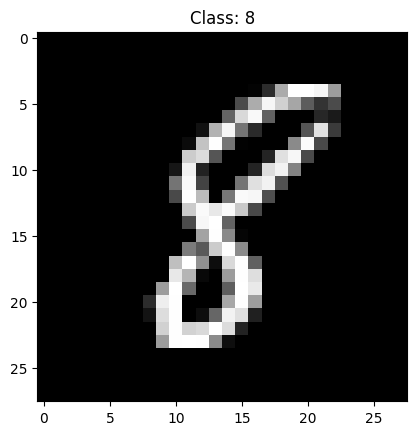

In [ ]:
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

In [ ]:
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
# sns.countplot(df_labels, x='Labels')

## **Load Kaggle**

In [ ]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-17 13:43:58--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   226MB/s    in 0.8s    

2023-12-17 13:43:59 (226 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [ ]:
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

In [ ]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [ ]:
# Check shape labels
alphabet_labels.shape

(372450,)

In [ ]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

Text(0.5, 1.0, 'Class: 24.0')

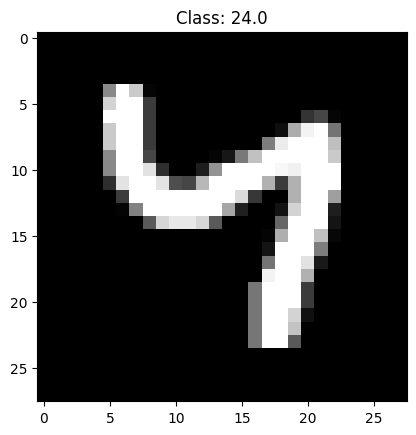

In [ ]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]))

In [ ]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
# sns.countplot(df_az_labels, x='Labels')

### **combine mnist and kaggle**

In [ ]:
# Check unique value from digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [ ]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

In [ ]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [ ]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])


In [ ]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [ ]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [ ]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [ ]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

## **Pre-Processing**

In [ ]:
# Normalize data
data /= 255.0


In [ ]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

In [ ]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)


In [ ]:
# Check labels shape
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

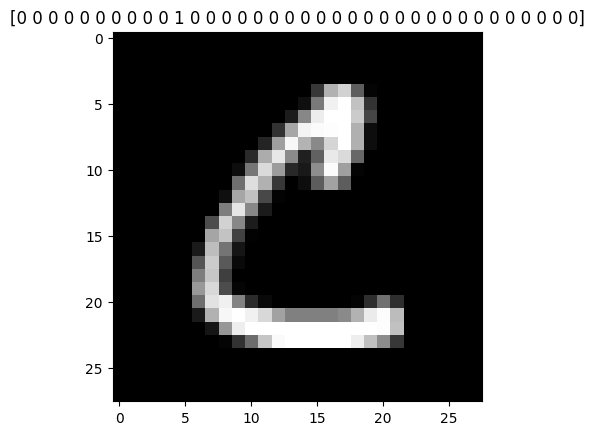

In [ ]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [ ]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [ ]:
# Check the biggest value of data
classes_total.max()

57825

In [ ]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

## **Split data to train and test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

## **Create data augmentation**

In [ ]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

## **Build CNN Model**

In [ ]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Build the network
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

# output
network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [ ]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [ ]:
import joblib

joblib.dump(name_labels, "labels.pkl")

['labels.pkl']

In [ ]:
a = joblib.load("labels.pkl")
print(a)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## **Train Model**

In [ ]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 10
batch_size = 128

In [ ]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [ ]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/10
2765/2765 [==============================] - ETA: 0s - loss: 2.1953 - accuracy: 0.8238
Epoch 1: val_loss improved from inf to 0.25805, saving model to custom_ocr.model
2765/2765 [==============================] - 144s 50ms/step - loss: 2.1953 - accuracy: 0.8238 - val_loss: 0.2580 - val_accuracy: 0.8897
Epoch 2/10
2764/2765 [============================>.] - ETA: 0s - loss: 0.9843 - accuracy: 0.9003
Epoch 2: val_loss did not improve from 0.25805
2765/2765 [==============================] - 132s 48ms/step - loss: 0.9843 - accuracy: 0.9003 - val_loss: 0.2718 - val_accuracy: 0.8912
Epoch 3/10
2765/2765 [==============================] - ETA: 0s - loss: 0.8196 - accuracy: 0.9124
Epoch 3: val_loss did not improve from 0.25805
2765/2765 [==============================] - 134s 48ms/step - loss: 0.8196 - accuracy: 0.9124 - val_loss: 0.2788 - val_accuracy: 0.8847
Epoch 4/10
2765/2765 [==============================] - ETA: 0s - loss: 0.7286 - accuracy: 0.9204
Epoch 4: val_loss improve

## **Evaluate Model**

### **Make a single prediction**

In [ ]:
# make a prediction
load_network = load_model('custom_ocr.model')
predictions = load_network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 2ms/step


In [ ]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[10]

array([2.4035275e-08, 1.0317733e-10, 4.0081126e-08, 3.9892228e-07,
       7.4341997e-13, 1.4168898e-03, 2.3856603e-06, 4.6372140e-13,
       1.1969472e-07, 5.7149083e-07, 1.6868120e-11, 2.9601411e-08,
       1.2501669e-09, 1.2208481e-09, 1.2151691e-11, 3.7188041e-11,
       3.6952490e-05, 1.3231595e-13, 1.4072776e-12, 2.7405358e-06,
       3.5707815e-12, 3.1083733e-08, 2.9198586e-18, 4.2124260e-13,
       1.9540314e-08, 2.5777502e-10, 1.4272761e-08, 1.9631493e-13,
       9.9853981e-01, 1.5327599e-12, 5.8874899e-13, 5.5579710e-14,
       1.0096303e-11, 2.3320408e-16, 2.0984599e-10, 3.5727320e-11],
      dtype=float32)

In [ ]:
# Get the actual prediction -> highest probability
np.argmax(predictions[10])

28

In [ ]:
# Check label for 24
name_labels[28]

'S'

In [ ]:
# Check y_test label for 0
y_test[10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# check the highest value
np.argmax(y_test[10])

28

In [ ]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[10])]

'S'

### **make an Evaluation on Test Data**

In [ ]:
# Evaluate on test data
load_network.evaluate(X_test, y_test)

2766/2766 [==============================] - 10s 3ms/step - loss: 0.1794 - accuracy: 0.9337


[0.17942951619625092, 0.9336761236190796]

In [ ]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.27      0.76      0.40      1381
           1       0.98      0.97      0.97      1575
           2       0.88      0.98      0.93      1398
           3       0.97      0.97      0.97      1428
           4       0.86      0.98      0.92      1365
           5       0.72      0.92      0.81      1263
           6       0.91      0.99      0.95      1375
           7       0.95      0.99      0.97      1459
           8       0.85      0.99      0.92      1365
           9       0.99      0.94      0.96      1392
           A       0.99      0.99      0.99      2774
           B       0.95      0.99      0.97      1734
           C       0.99      0.97      0.98      4682
           D       0.92      0.96      0.94      2027
           E       0.99      0.97      0.98      2288
           F       0.94      1.00      0.97       233
           G       0.93      0.93      0.93      1152
           H       0.98    

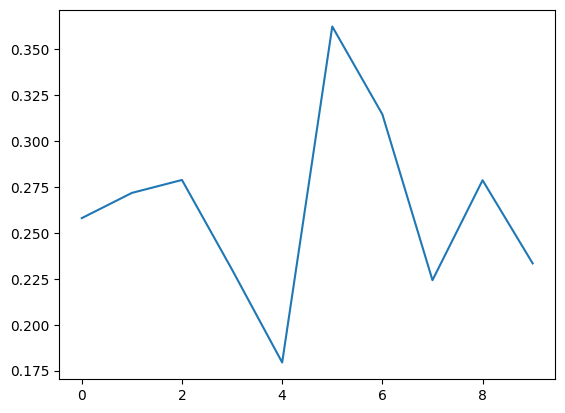

In [ ]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])

In [ ]:
# You can also check the another metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

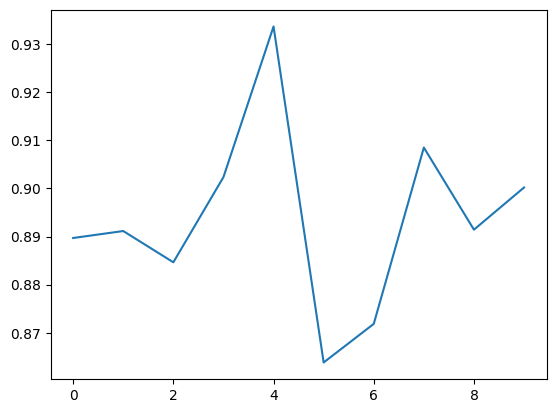

In [ ]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

### **Save the Model**

In [ ]:
# The result will show in colab directory
network.save('model_cnn_ml', save_format= 'h5')

save_path="/content/drive/MyDrive/PCVK/Tubes"
network.save(save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **Testing on Real Image**

In [ ]:
import numpy as np
import imutils
import cv2
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
from google.colab.patches import cv2_imshow

In [ ]:
# Load saved network
load_network = load_model('network')

In [ ]:
# Check summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

## **Mencoba OCR**

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Tubes/3G_2141720107_1 - FALENDIKA TEGAR PRATAMA.jpg')

Text(0.5, 1.0, 'Cropped image')

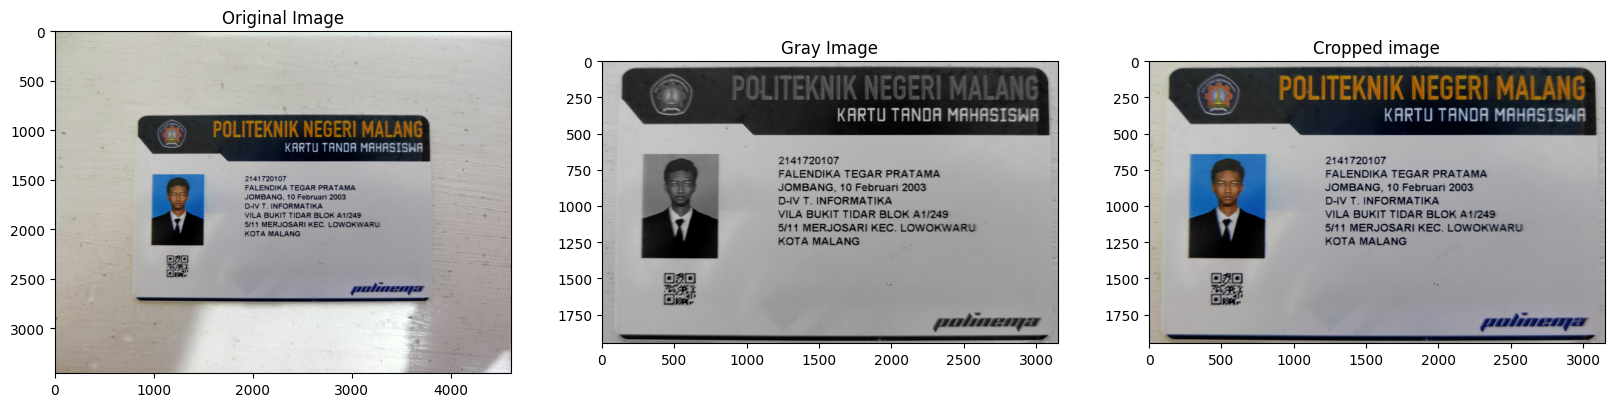

In [ ]:
img_ori = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

def cutting(image, x, y, width, height):
    # Crop the region of interest from the image
    hasil = image[y:y+height, x:x+width]

    return hasil

# Tentukan koordinat untuk crop
x, y, width, height = 700, 800, 3150, 1950

img_crop = cutting(img_ori, x, y, width, height)

# img_rgb = cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)

img_crp = cv2.cvtColor(img_crop.copy(), cv2.COLOR_BGR2RGB)
# blurred_image = cv2.GaussianBlur(img_gray, (1, 1), 0)

equalized_image = cv2.equalizeHist(img_gray)

img_gray = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.title('Gray Image')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_crp, cv2.COLOR_BGR2RGB))
plt.title('Cropped image')

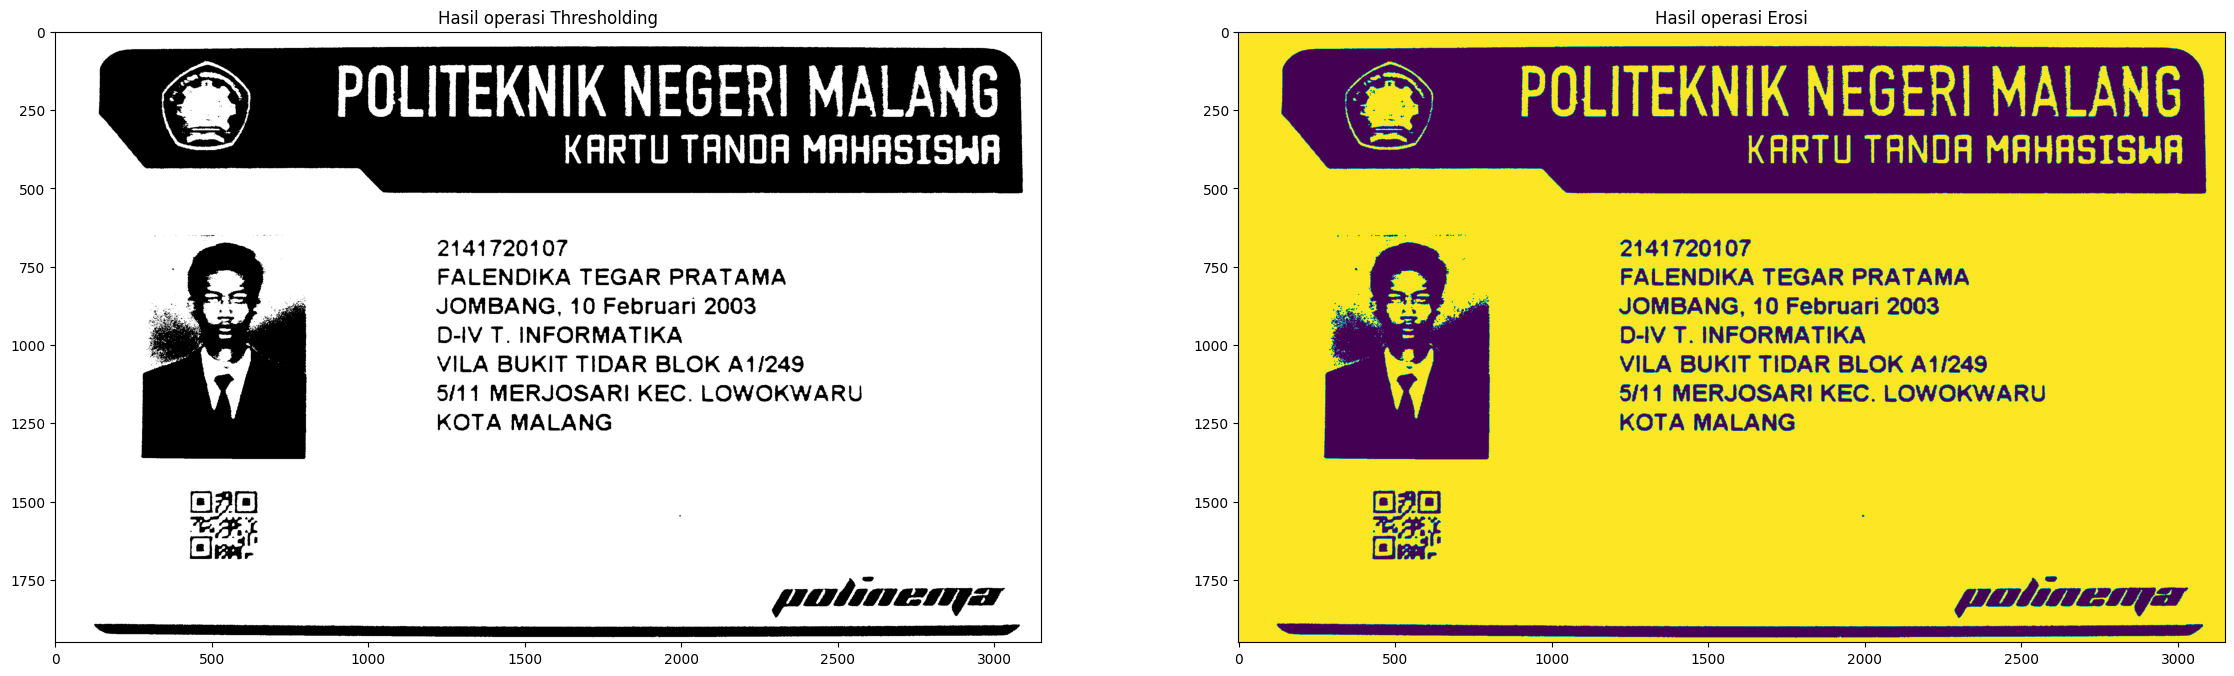

In [ ]:
# global_threshold_value = 80

def global_thresholding(image, threshold):
    binary = np.zeros_like(image)
    binary[image > threshold] = 255
    return binary
# _, thresholded_image = cv2.threshold(blurred_image, global_threshold_value, 255, cv2.THRESH_BINARY)
# kernel = np.ones((1, 1), np.uint8)

# morph_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_ERODE, kernel)
# thresholded_image = cv.cvtColor(thresholded_image, cv.COLOR_GRAY2RGB)
img = cv2.cvtColor(img_crop, cv2.COLOR_RGB2GRAY)

global_threshold = global_thresholding(img, 85)
# thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# Peningkatan kontras
# alpha = 2  # Sesuaikan nilai alpha sesuai kebutuhan
# beta = 0     # Sesuaikan nilai beta sesuai kebutuhan
# enhanced_image = cv2.convertScaleAbs(global_threshold, alpha=alpha, beta=beta)
erode_ktp = cv2.erode(global_threshold.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (3, 3)))

# erode_1 = cv2.cvtColor(erode, cv2.COLOR_GRAY2RGB)
global_threshold_1 = cv2.cvtColor(global_threshold, cv2.COLOR_GRAY2RGB)

fig, axs = plt.subplots(1, 2, figsize=(28, 10))

axs[0].imshow(global_threshold_1)
axs[0].set_title('Hasil operasi Thresholding')

axs[1].imshow(erode_ktp)
axs[1].set_title('Hasil operasi Erosi')
plt.show()

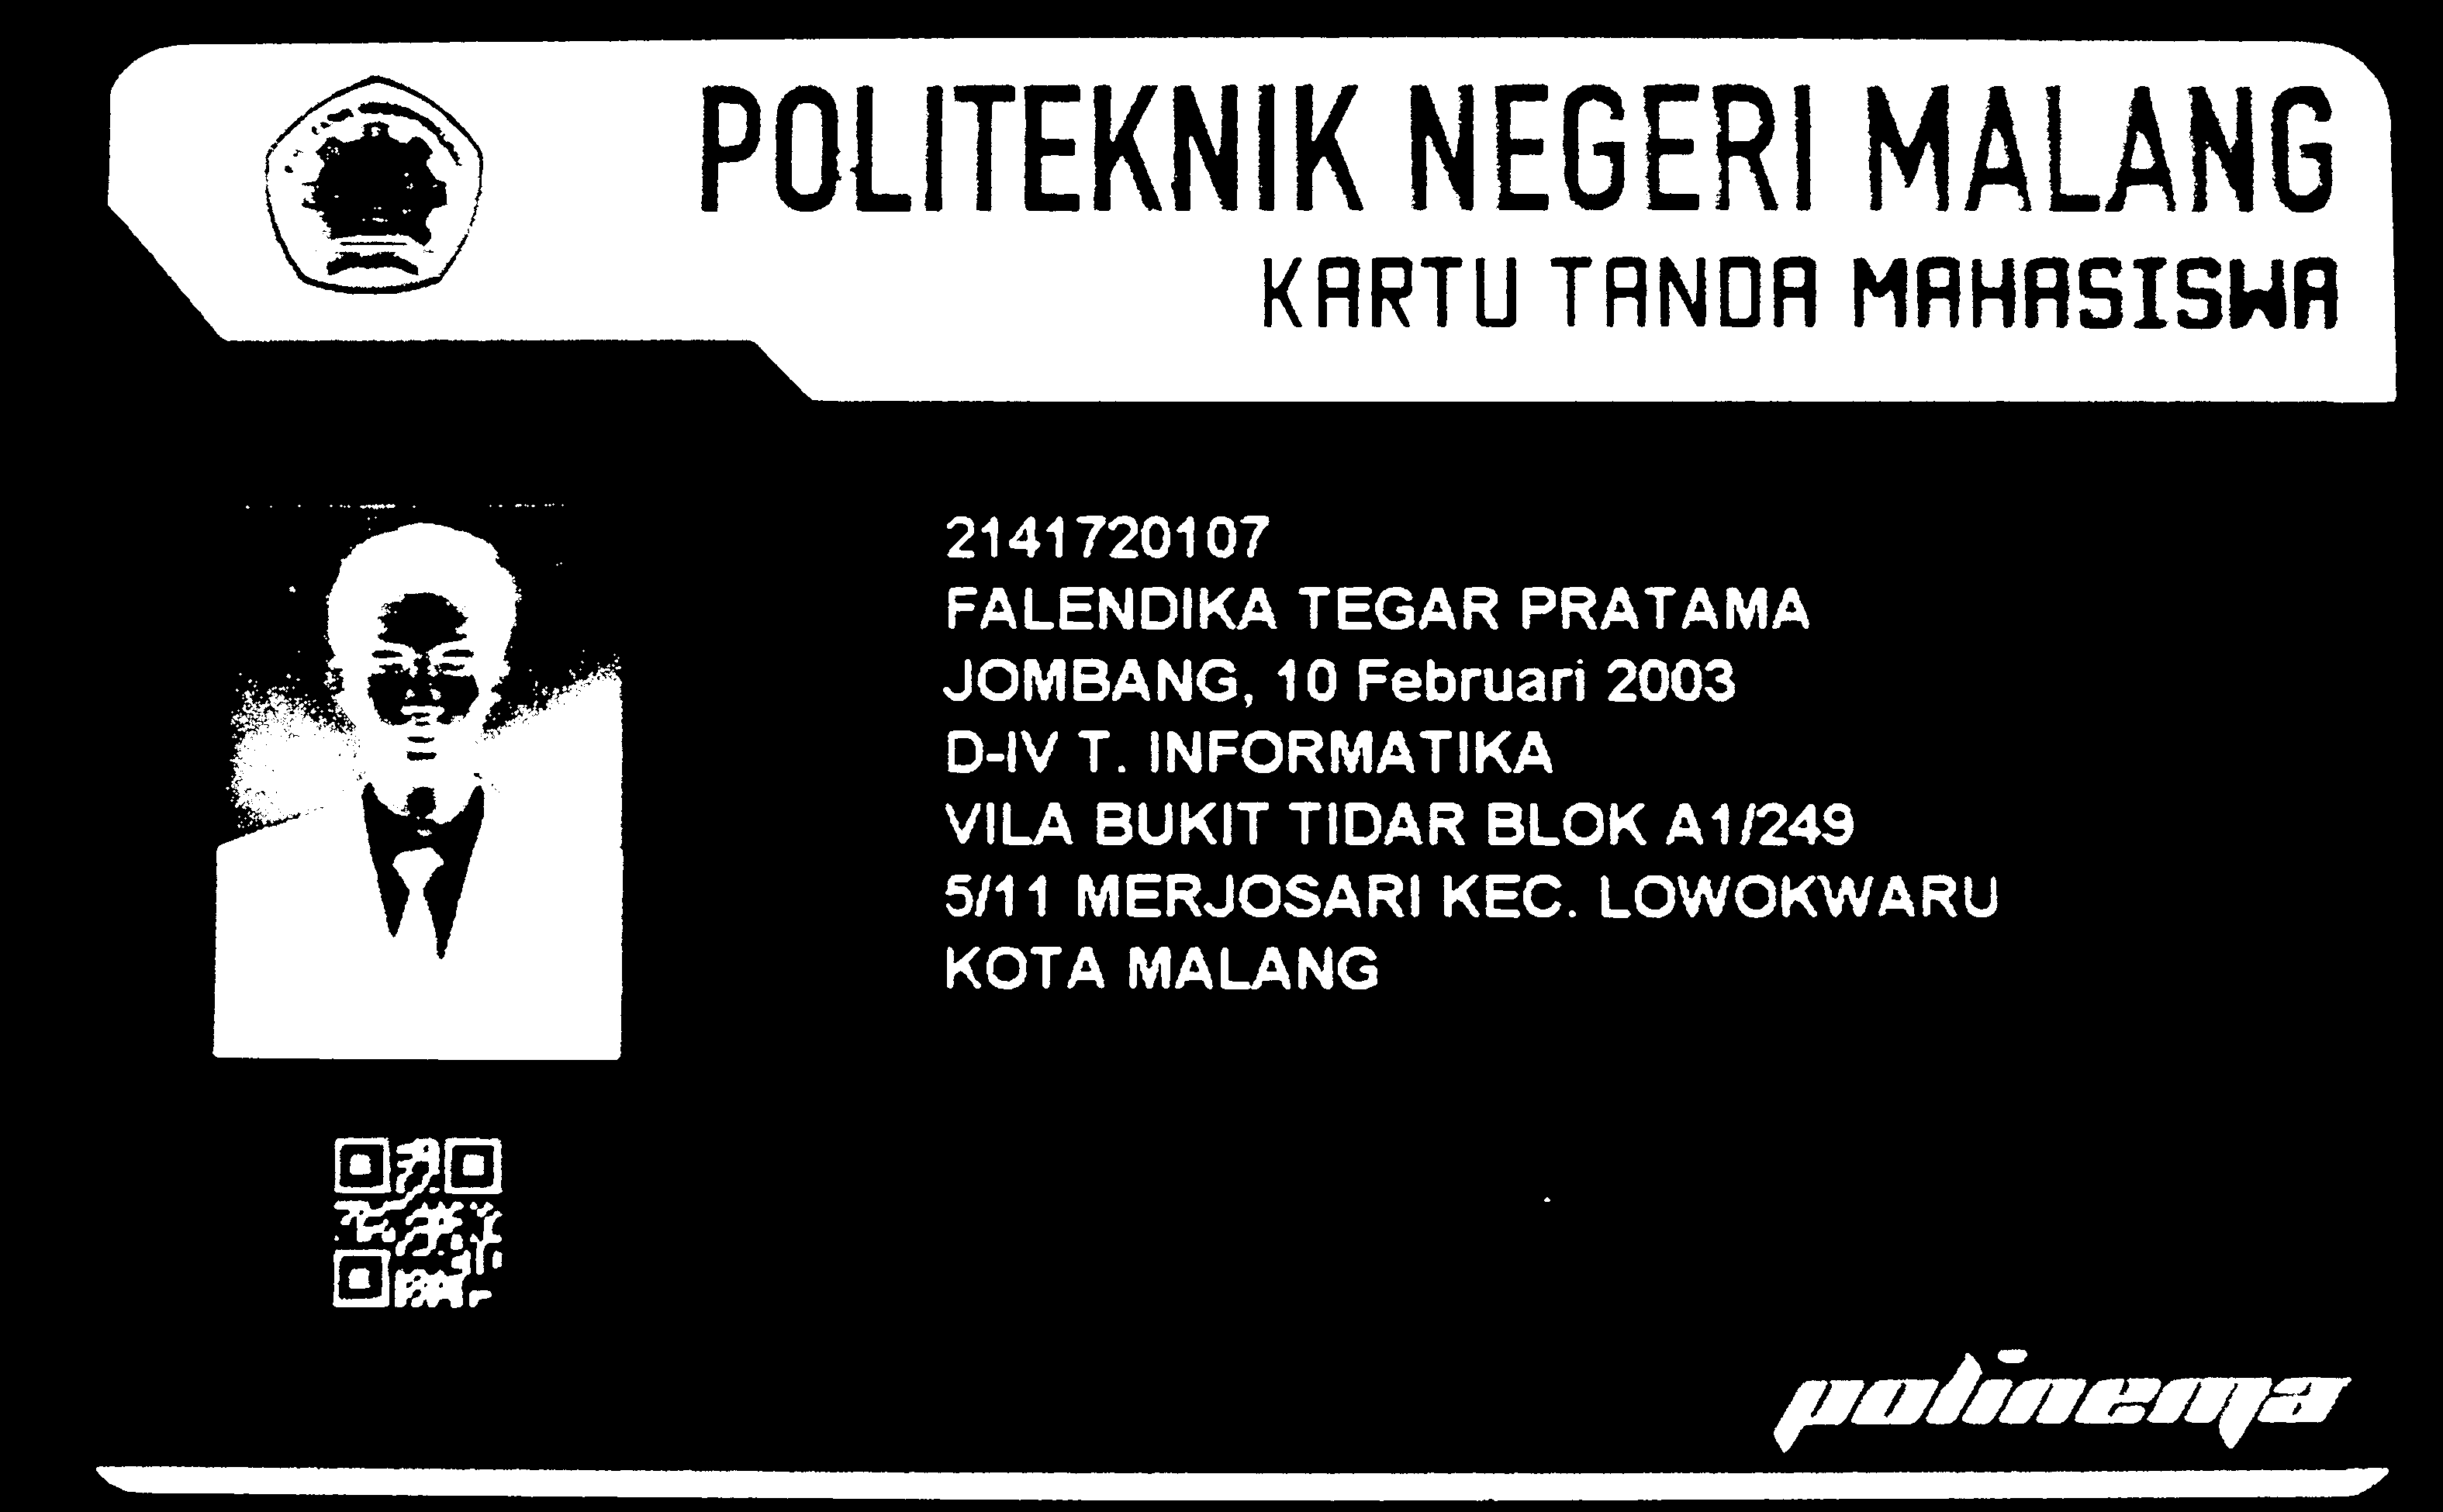

In [ ]:
# inverse image since we trained out model
img = erode_ktp.copy()
# with black background
invertion = 255 - img
# check
cv2_imshow(invertion)

In [ ]:
def find_contours(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method='left-to-right')[0]

  return conts

In [ ]:
conts = find_contours(invertion.copy())

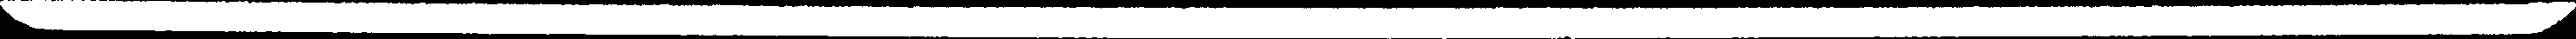

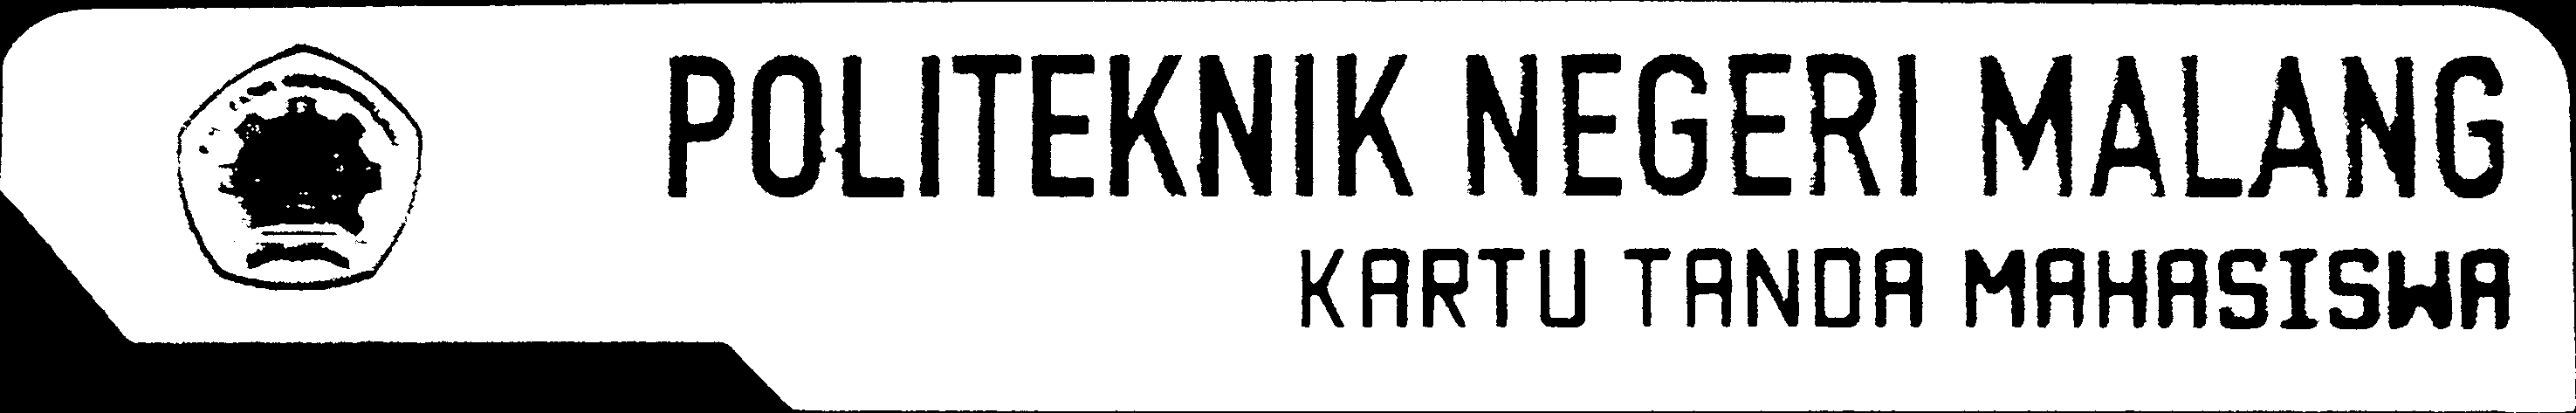

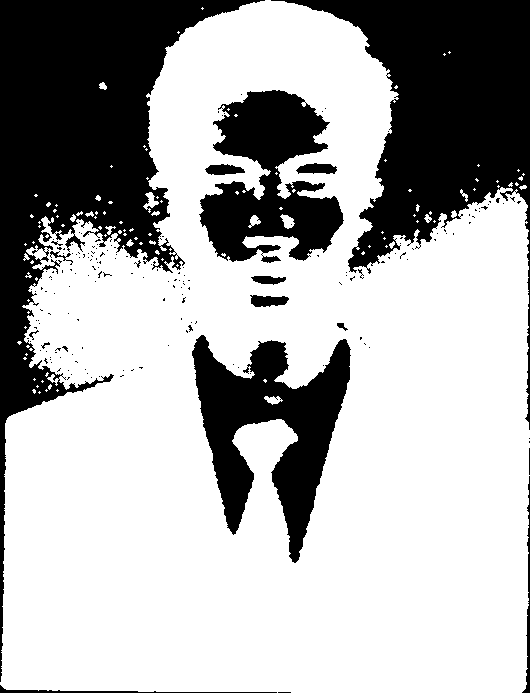

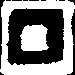

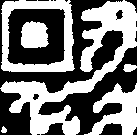

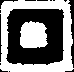

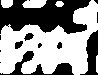

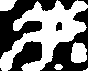

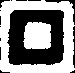

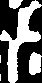

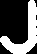

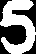

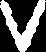

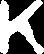

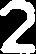

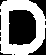

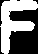

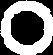

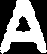

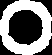

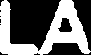

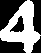

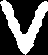

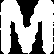

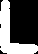

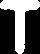

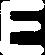

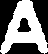

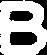

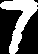

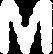

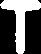

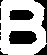

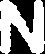

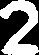

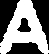

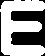

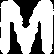

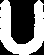

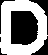

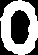

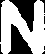

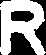

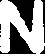

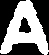

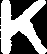

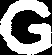

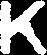

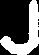

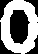

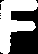

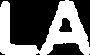

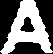

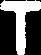

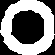

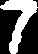

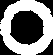

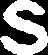

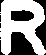

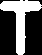

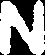

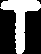

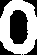

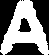

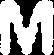

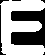

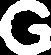

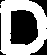

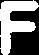

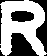

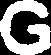

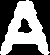

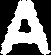

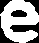

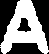

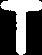

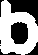

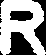

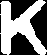

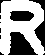

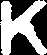

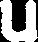

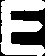

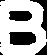

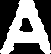

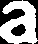

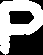

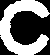

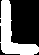

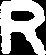

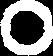

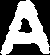

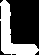

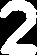

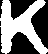

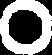

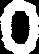

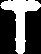

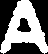

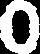

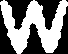

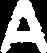

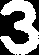

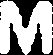

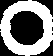

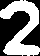

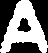

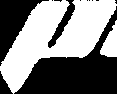

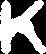

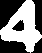

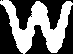

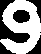

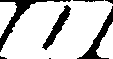

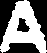

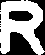

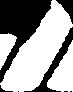

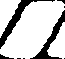

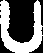

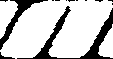

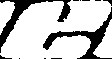

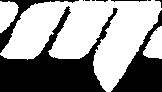

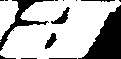

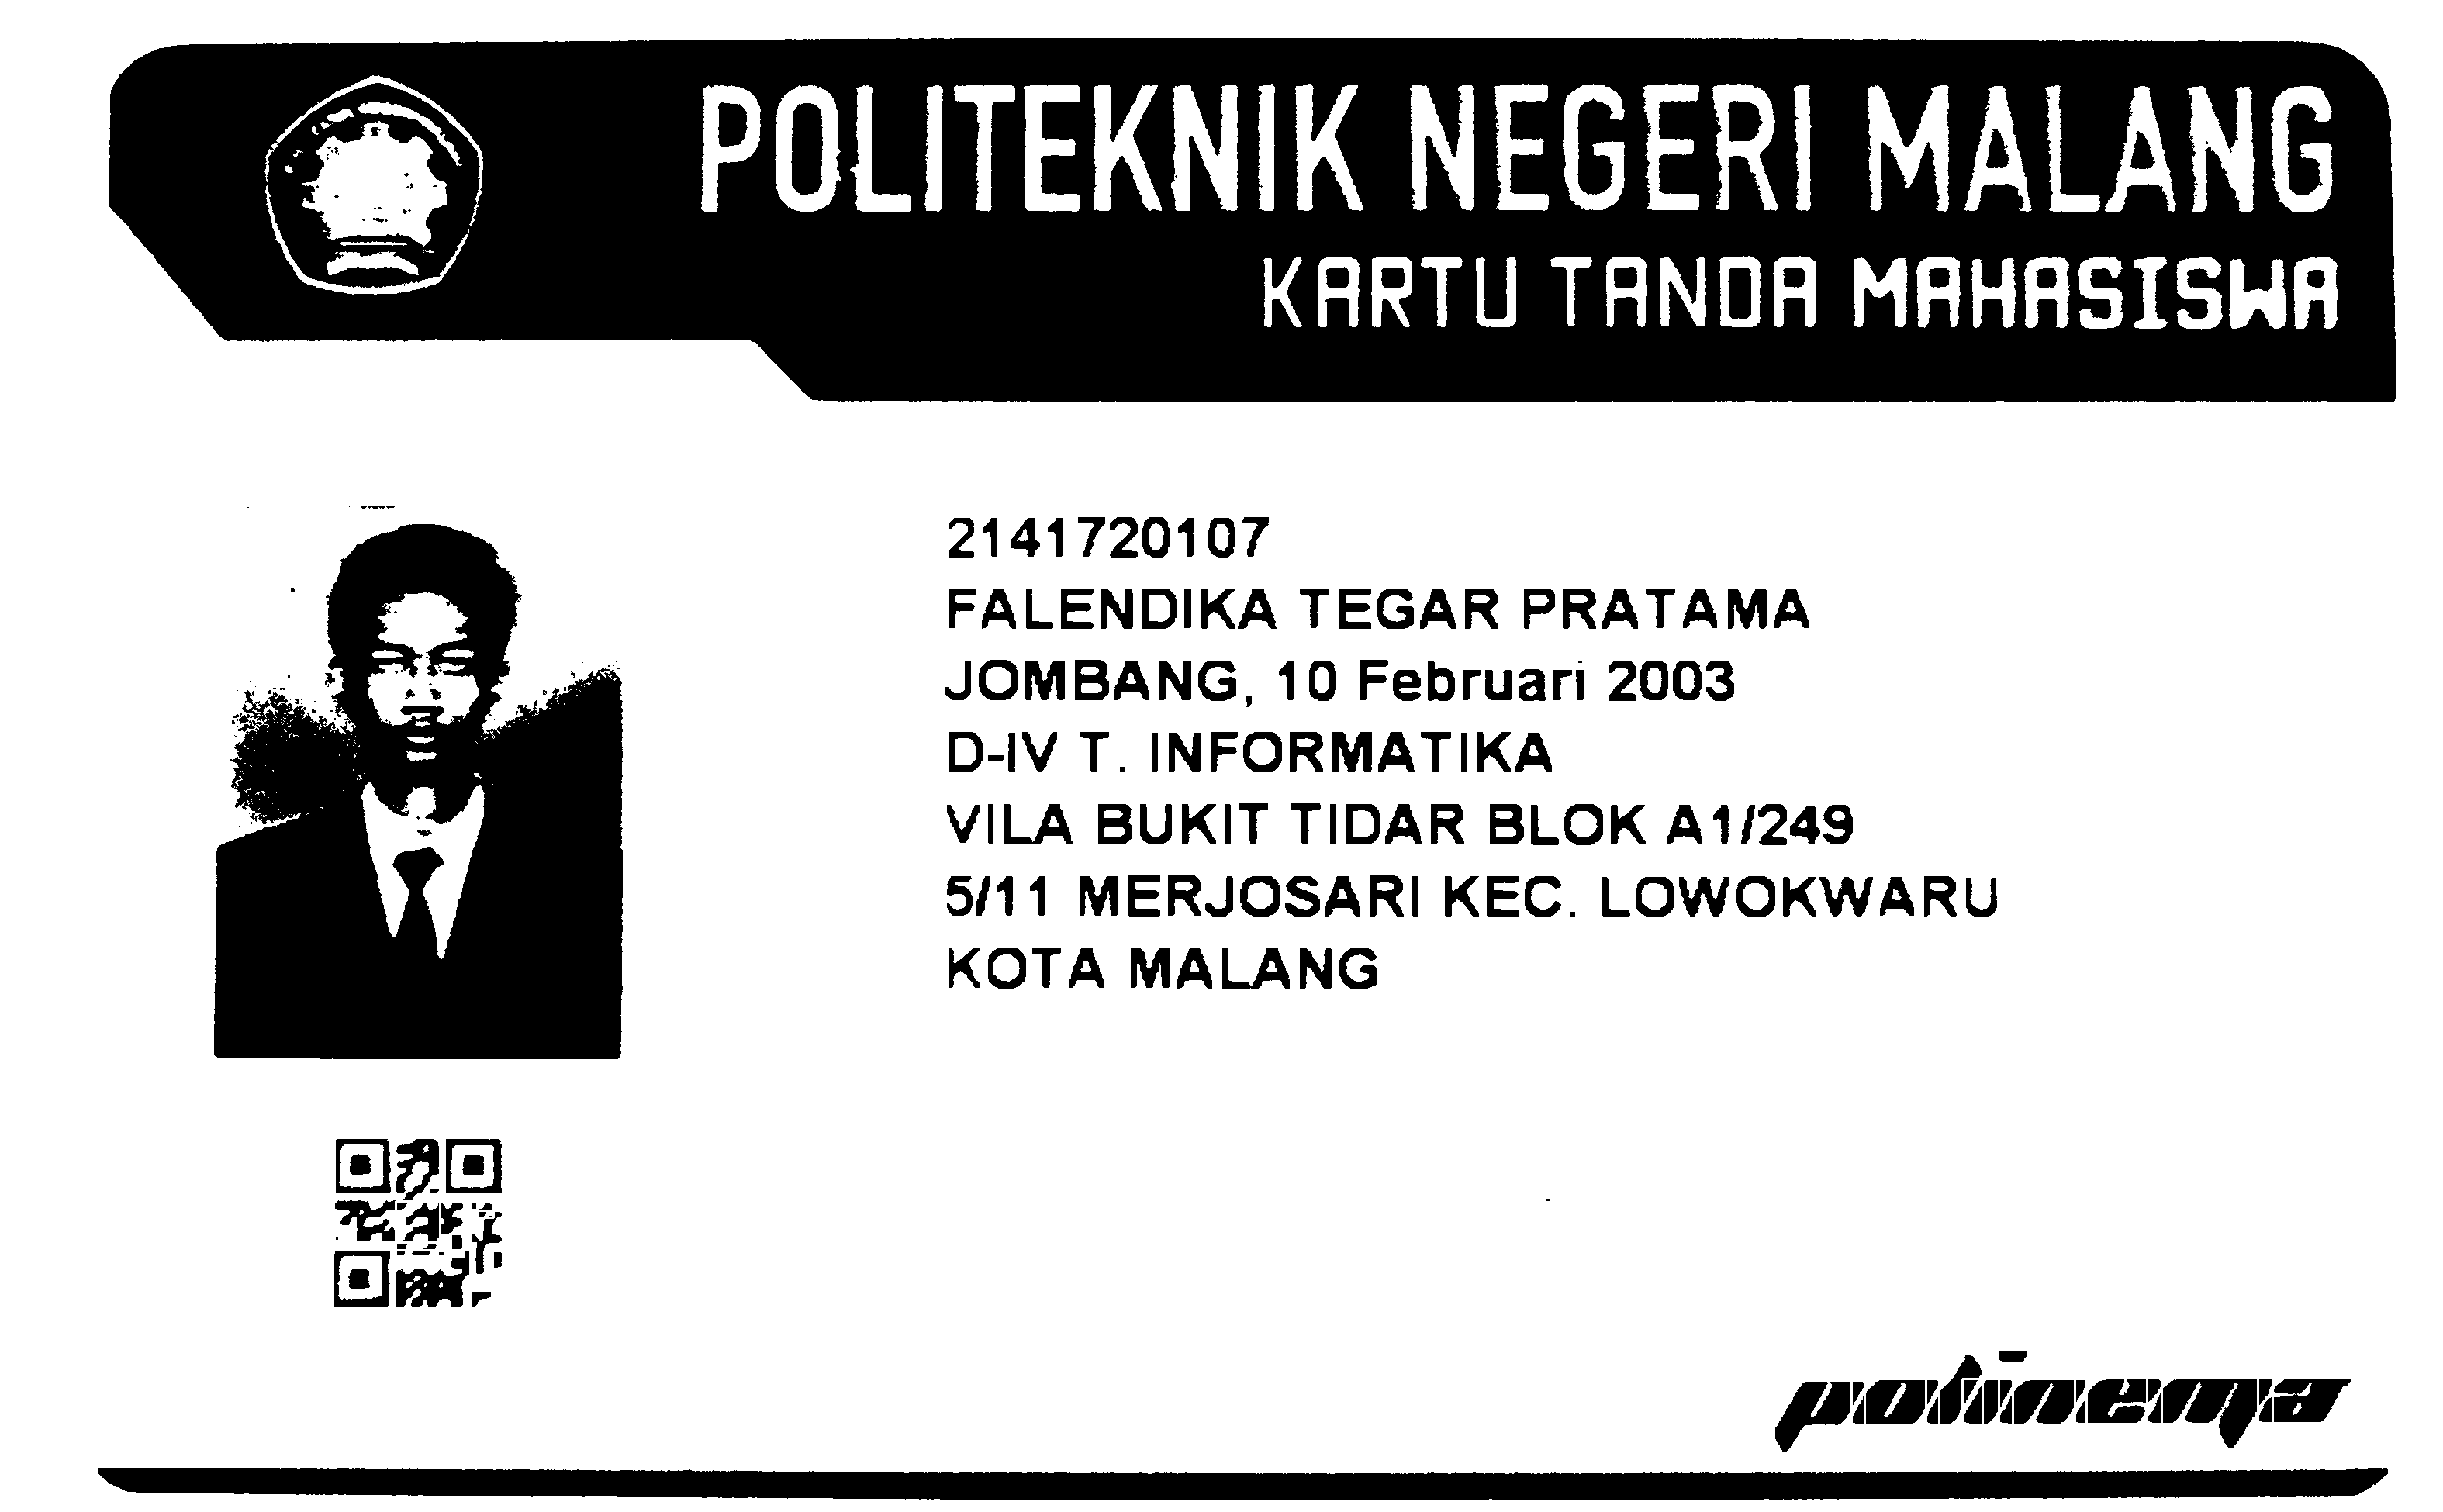

In [ ]:
# Get the char based on contour

# Setup min/max width/hight for char
min_w, max_w = 80, 160
min_h, max_h = 80, 140
img_copy = img.copy() # original image for plotting countour result

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
  # if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
  roi = img[y:y+h, x:x+w] # get region of interest for char
  thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  cv2_imshow(thresh) # check

  # Build bounding box on original image
  cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)

# Show bounding box on original image
cv2_imshow(img_copy)

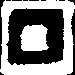

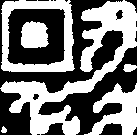

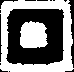

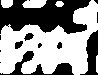

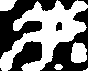

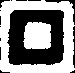

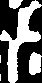

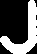

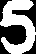

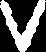

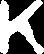

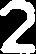

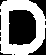

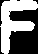

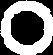

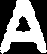

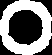

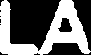

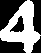

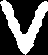

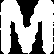

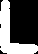

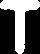

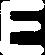

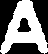

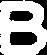

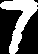

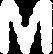

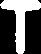

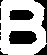

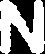

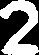

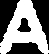

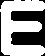

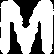

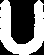

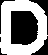

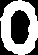

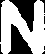

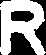

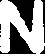

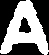

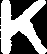

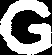

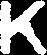

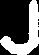

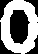

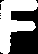

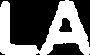

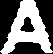

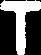

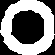

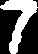

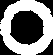

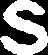

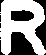

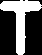

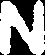

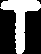

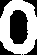

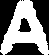

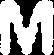

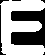

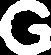

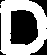

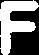

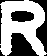

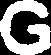

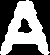

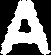

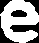

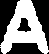

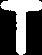

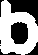

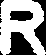

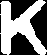

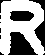

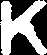

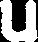

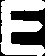

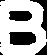

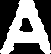

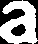

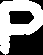

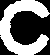

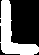

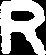

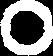

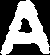

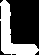

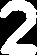

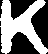

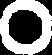

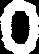

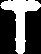

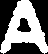

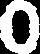

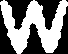

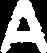

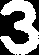

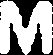

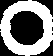

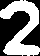

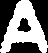

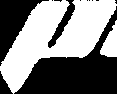

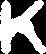

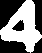

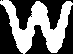

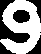

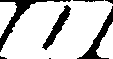

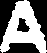

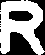

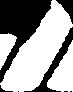

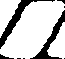

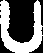

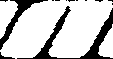

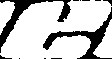

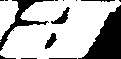

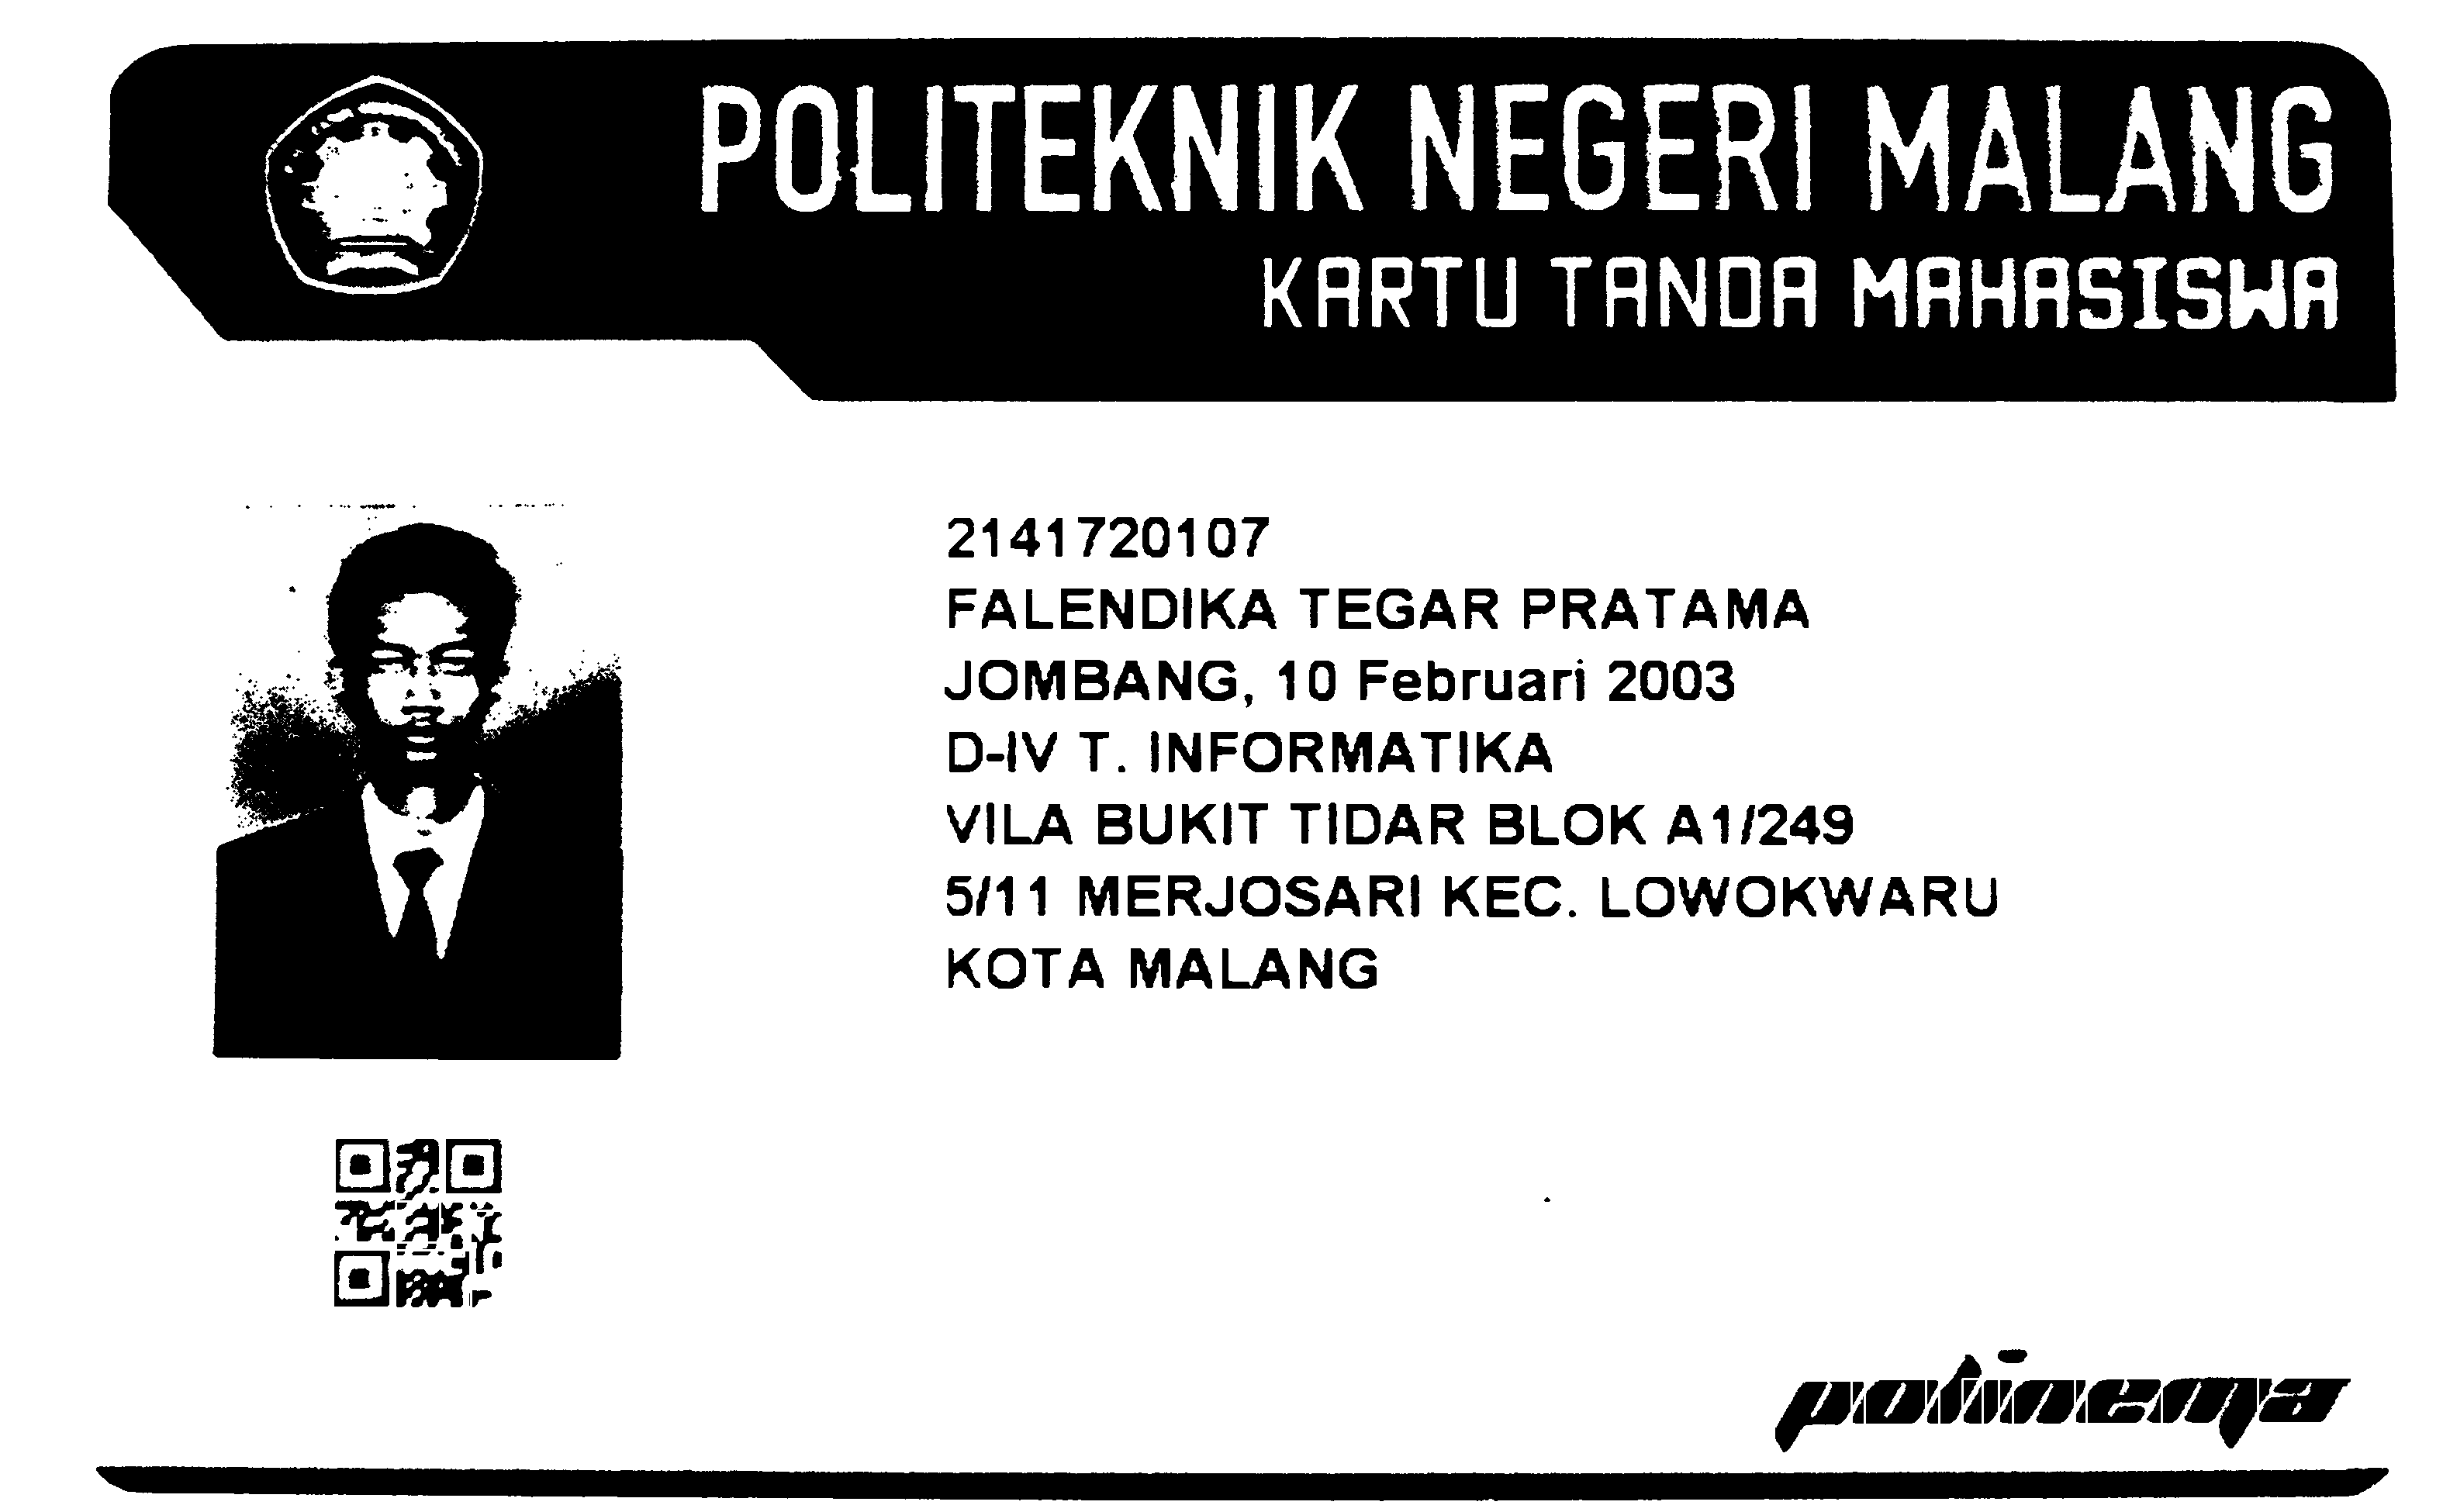

In [ ]:
# Get the char based on contour

# Setup min/max width/hight for char
min_w, max_w = 20, 160
min_h, max_h = 24, 140
img_copy = img.copy()

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
    roi = img[y:y+h, x:x+w] # get region of interest for char
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh) # check

    # Build bounding box on original image
    cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)

# Show bounding box on original image
cv2_imshow(img_copy)

## **Detect Char**

### **ROI extrection**

In [ ]:
def extract_roi(img):
  roi = img[y:y+h, x:x+w]

  return roi

### **Thresholding**

In [ ]:
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  return thresh

### **Resizing**

In [ ]:
def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width=28)
  else:
    resized = imutils.resize(img, height=28)

  # (w, h) = resized.shape
  (h, w) = resized.shape

  # Calculate how many pixels need to fill char image
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  filled = cv2.resize(filled, (28,28))

  return filled

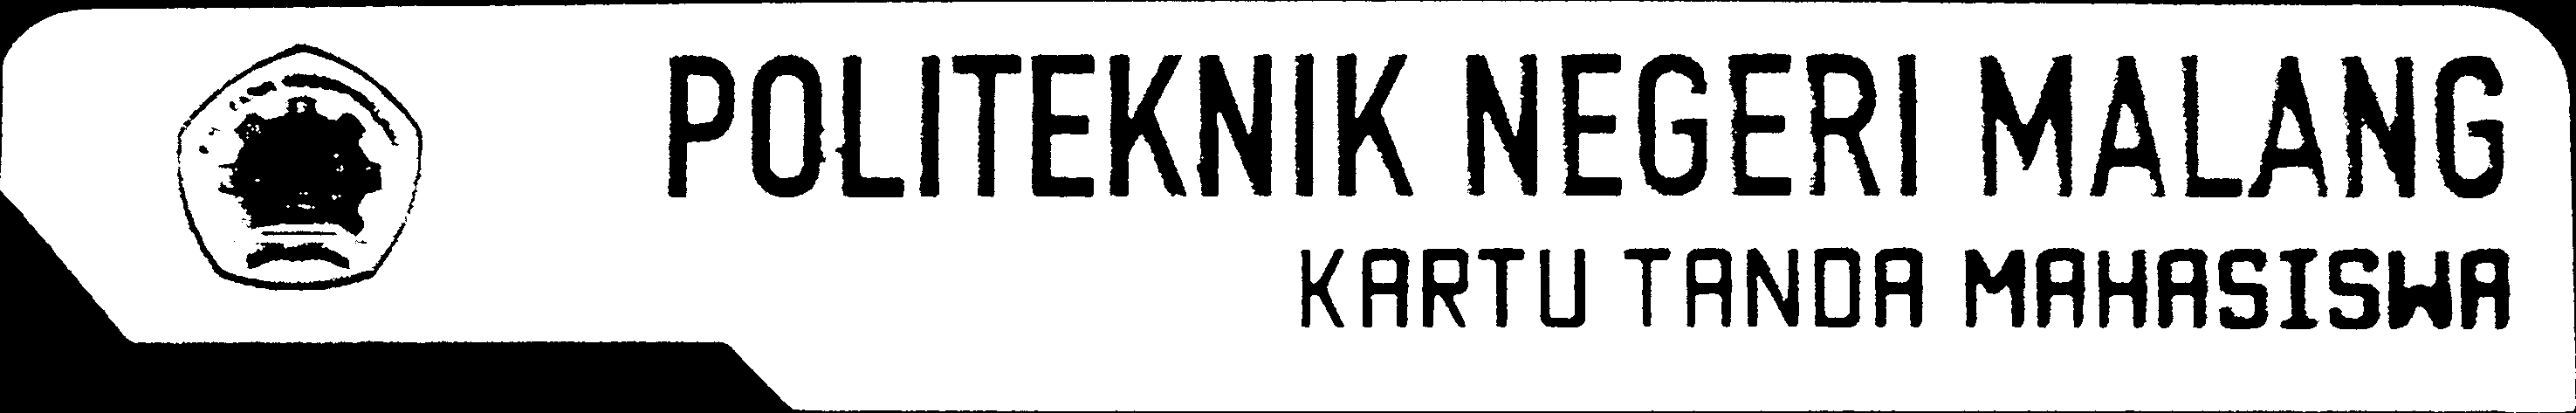

In [ ]:
# Demo for enlarge
(x, y, w, h) = cv2.boundingRect(conts[1])
test_image = thresholding(img[y:y+h, x:x+w])

# show original test image
cv2_imshow(test_image)

# Show enlarge test image
cv2_imshow(cv2.resize(test_image, (28,28)))

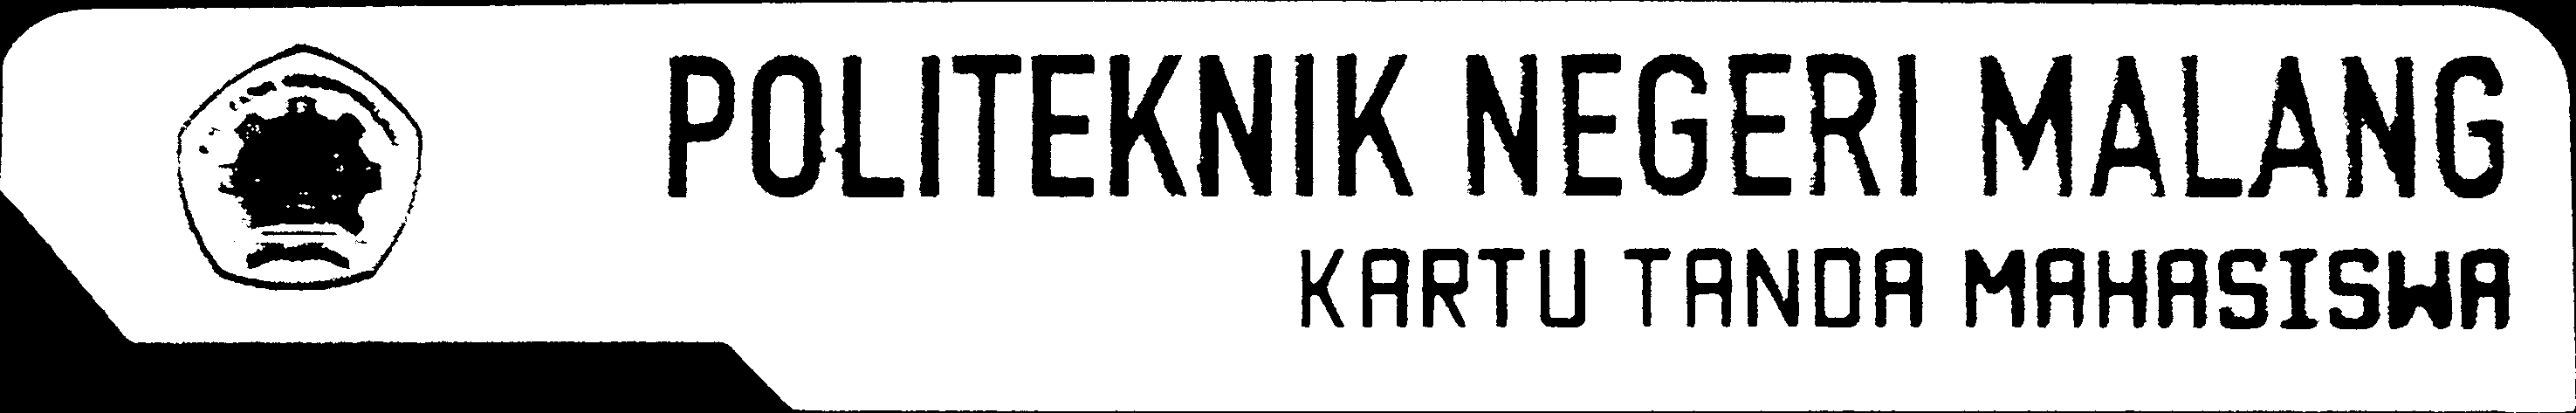

In [ ]:
# Demo by filled strategy
# (w, h) = test_image.shape
(h, w) = test_image.shape

test_image2 = resize_img(test_image, w, h)

cv2_imshow(test_image)
cv2_imshow(test_image2)

### **Normalization**

In [ ]:
def normalization(img):
  img = img.astype('float32') / 255.0 # convert to floating point
  img = np.expand_dims(img, axis=-1) # add depth
  return img

In [ ]:
# Check
test_image2.shape, normalization(test_image2).shape

((28, 28), (28, 28, 1))

### **Detection**

In [ ]:
def process_box(gray, x, y, w, h):

  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)

  # show result
  cv2_imshow(resized)

  normalized = normalization(resized)

  return (normalized, (x, y, w, h))

In [ ]:
# Detect every single char from contour
detected_char = []

for c in conts:
  (x, y, w, h ) = cv2.boundingRect(c)

  min_w, max_w = 30, 160
  min_h, max_h = 34, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(img, x, y, w, h))

In [ ]:
# Get all char pixel
pixels = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes = [box[1] for box in detected_char]

In [ ]:
pixels.shape

(118, 28, 28, 1)

### **Recognize Char**

In [ ]:
digits = '0123456789'
letters = 'ABCDEFGHIJKLMNOPQRSTUVWZYZ'
char_list = digits + letters
char_list = [ch for ch in char_list]

print(char_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Z', 'Y', 'Z']


In [ ]:
# Predict
preds = network.predict(pixels)

# check shape -> JTI POLINEMA --> shoud be 11 (from 0 to 10)
preds.shape

4/4 [==============================] - 0s 76ms/step


(118, 36)

In [ ]:
# Char Prediction
for p in preds:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

5 Z 5 H H G Z J 5 V K 2 D F 0 A 0 U 4 V W L T E A B 7 W T B N 2 A E W U D O N R N A K G K J 0 F U A T 0 7 0 S R T N T 0 A W E G D F R G A A E A T D R K R K U E B A 2 P C L R 0 A L 2 K 0 0 T A 0 W A 3 W 0 2 A P K 4 W 9 M A R W E U M W W 

In [ ]:
# Show char with actual image
img_copy2 = img_crp.copy()

for(pred, (x, y, w, h)) in zip(preds, boxes):
  i = np.argmax(pred)
  char_detected = char_list[i]

  cv2.rectangle(img_copy2, (x, y), (x+w, y+h), (0,255,0), 2)
  cv2.putText(img_copy2, char_detected, (x - 10, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)

cv2_imshow(img_copy2)

### **Put margin on Bounding box**

In [ ]:
# Redefine roi --> include margin
def extract_roi(img, margin=2):
  roi = img[y - margin:y+h, x - margin:x + w + margin]
  return roi

In [ ]:
# Perform detection agian
conts2 = find_contours(invertion.copy())

# Detect every single char from contour
detected_char = []

for c in conts2:
  (x, y, w, h ) = cv2.boundingRect(c)

  min_w, max_w = 15, 160
  min_h, max_h = 30, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(img, x, y, w, h))

In [ ]:
# Get all char pixel
pixels = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes = [box[1] for box in detected_char]

In [ ]:
# Predict
preds = network.predict(pixels)
preds.shape

5/5 [==============================] - 0s 59ms/step


(129, 36)

In [ ]:
# Show char with actual image
img_copy3 = img_crp.copy()

for(pred, (x, y, w, h)) in zip(preds, boxes):
  i = np.argmax(pred)
  char_detected = char_list[i]

  cv2.rectangle(img_copy3, (x, y), (x+w, y+h), (0,255,0), 2)
  cv2.putText(img_copy3, char_detected, (x - 10, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)

cv2_imshow(img_copy3)

In [ ]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    # Display the original image
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.subplot(2, 3, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')

    # Apply Gaussian Blur
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    plt.subplot(2, 3, 3)
    plt.imshow(blur, cmap='gray')
    plt.title('Gaussian Blur')
    plt.axis('off')

    # Apply Adaptive Threshold
    global_threshold = global_thresholding(blur, 85)
    plt.subplot(2, 3, 4)
    plt.imshow(global_threshold, cmap='gray')
    plt.title('Global Threshold')
    plt.axis('off')

    #Erosi the image
    erode_ktp = cv2.erode(global_threshold.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (3, 3)))
    plt.subplot(2, 3, 5)
    plt.imshow(erode_ktp, cmap='gray')
    plt.title('Erosi Image')
    plt.axis('off')


    # Invert the image
    invertion = 255 - erode_ktp
    plt.subplot(2, 3, 6)
    plt.imshow(invertion, cmap='gray')
    plt.title('Invertion Image')
    plt.axis('off')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    return img, gray, invertion

In [ ]:
def preprocess_image_2(image_path):
    img = cv2.imread(image_path)
    # Display the original image
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.subplot(2, 3, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')

    # Apply Gaussian Blur
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    plt.subplot(2, 3, 3)
    plt.imshow(blur, cmap='gray')
    plt.title('Gaussian Blur')
    plt.axis('off')

    # Apply Adaptive Threshold
    global_threshold = global_thresholding(blur, 125)
    plt.subplot(2, 3, 4)
    plt.imshow(global_threshold, cmap='gray')
    plt.title('Global Threshold')
    plt.axis('off')

    #Erosi the image
    erode_ktp = cv2.erode(global_threshold.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (4, 4)))
    plt.subplot(2, 3, 5)
    plt.imshow(erode_ktp, cmap='gray')
    plt.title('Erosi Image')
    plt.axis('off')


    # Invert the image
    invertion = 255 - erode_ktp
    plt.subplot(2, 3, 6)
    plt.imshow(invertion, cmap='gray')
    plt.title('Invertion Image')
    plt.axis('off')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    return img, gray, invertion

In [ ]:
def process_contours(conts, gray, img, min_w, max_w, min_h, max_h):
    img_copy = img.copy()

    for c in conts:
        (x, y, w, h) = cv2.boundingRect(c)

        if min_w <= w <= max_w and min_h <= h <= max_h:
            roi = gray[y:y+h, x:x+w]
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
            cv2_imshow(thresh)  # Check

            cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Show bounding box on original image
    cv2_imshow(img_copy)

In [ ]:
def extract_roi(img, x, y, w, h, margin=2):
    roi = img[y - margin:y+h, x - margin:x + w + margin]
    return roi

In [ ]:
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  return thresh

In [ ]:
def resize_img(img, w, h):
    if w > h:
        resized = imutils.resize(img, width=28)
    else:
        resized = imutils.resize(img, height=28)

    print("Resized Image Shape:", resized.shape)  # Add this line

    # (w, h) = resized.shape
    (h, w) = resized.shape

    # Calculate how many pixels need to fill char image
    dX = int(max(0, 28 - w) / 2.0)
    dY = int(max(0, 28 - h) / 2.0)

    filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0, 0, 0))

    print("Filled Image Shape:", filled.shape)  # Add this line

    filled = cv2.resize(filled, (28, 28))

    return filled


In [ ]:
def normalization(img):
  img = img.astype('float32') / 255.0 # convert to floating point
  img = np.expand_dims(img, axis=-1) # add depth
  return img

In [ ]:
def process_box(gray, x, y, w, h):
  roi = extract_roi(gray, x, y, w, h)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)

  cv2_imshow(resized)  # Show result

  normalized = normalization(resized)

  return (normalized, (x, y, w, h))

In [ ]:
def detect_characters(conts, gray, min_w, max_w, min_h, max_h):
    detected_char = []
    for c in conts:
        (x, y, w, h) = cv2.boundingRect(c)

        if min_w <= w <= max_w and min_h <= h <= max_h:
            detected_char.append(process_box(gray, x, y, w, h))

    return detected_char

In [ ]:
def ocr(image_path):
    img, gray, invertion = preprocess_image(image_path)

    min_w, max_w = 10, 160
    min_h, max_h = 14, 140

    conts = find_contours(invertion.copy())
    process_contours(conts, gray, img, min_w, max_w, min_h, max_h)

    detected_char = detect_characters(conts, gray, min_w, max_w, min_h, max_h)

    pixels = np.array([px[0] for px in detected_char], dtype='float32')
    boxes = [box[1] for box in detected_char]

    digits = '0123456789'
    letters = 'ABCDEFGHIJKLMNOPQRSTUVWZYZ'
    char_list = digits + letters
    char_list = [ch for ch in char_list]

    print(char_list)

    # Predict
    preds = network.predict(pixels)

    # check shape -> JTI POLINEMA --> shoud be 11 (from 0 to 10)
    preds.shape

    # Char Prediction
    for p in preds:
      char_idx = np.argmax(p)
      print(char_list[char_idx], end = " ")

    # Show char with actual image
    img_copy2 = img.copy()

    for(pred, (x, y, w, h)) in zip(preds, boxes):
      i = np.argmax(pred)
      char_detected = char_list[i]

      cv2.rectangle(img_copy2, (x, y), (x+w, y+h), (0,255,0), 2)
      cv2.putText(img_copy2, char_detected, (x - 10, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 2)

    cv2_imshow(img_copy2)

In [ ]:
def ocr_2(image_path):
    img, gray, invertion = preprocess_image(image_path)

    min_w, max_w = 10, 160
    min_h, max_h = 14, 140

    conts = find_contours(invertion.copy())
    process_contours(conts, gray, img, min_w, max_w, min_h, max_h)

    detected_char = detect_characters(conts, gray, min_w, max_w, min_h, max_h)

    pixels = np.array([px[0] for px in detected_char], dtype='float32')
    boxes = [box[1] for box in detected_char]

    digits = '0123456789'
    letters = 'ABCDEFGHIJKLMNOPQRSTUVWZYZ'
    char_list = digits + letters
    char_list = [ch for ch in char_list]

    print(char_list)

    # Predict
    preds = network.predict(pixels)

    # check shape -> JTI POLINEMA --> shoud be 11 (from 0 to 10)
    preds.shape

    # Char Prediction
    for p in preds:
      char_idx = np.argmax(p)
      print(char_list[char_idx], end = " ")

    # Show char with actual image
    img_copy2 = img.copy()

    for(pred, (x, y, w, h)) in zip(preds, boxes):
      i = np.argmax(pred)
      char_detected = char_list[i]

      cv2.rectangle(img_copy2, (x, y), (x+w, y+h), (0,255,0), 2)
      cv2.putText(img_copy2, char_detected, (x - 10, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 2)

    cv2_imshow(img_copy2)

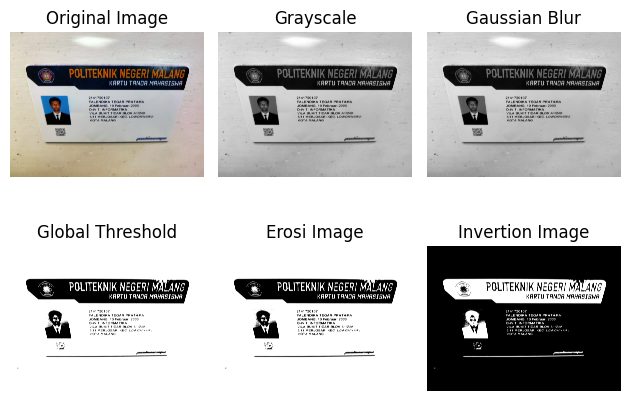

In [ ]:
image_path = '/content/drive/MyDrive/PCVK/Tubes/3G_2141720107_2 - FALENDIKA TEGAR PRATAMA.jpg'
Preprocess = preprocess_image(image_path)

In [ ]:
ocr(image_path)

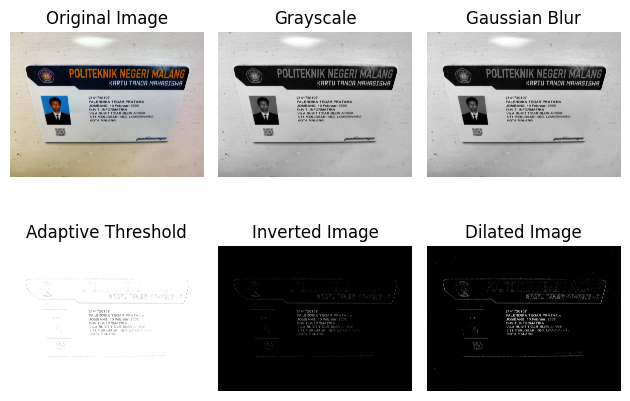

In [ ]:
image_path_falendika_3 = '/content/drive/MyDrive/PCVK/Tubes/3G_2141720107_3 - FALENDIKA TEGAR PRATAMA.jpg'
Preprocess = preprocess_image(image_path)

In [ ]:
ocr(image_path_falendika_3)

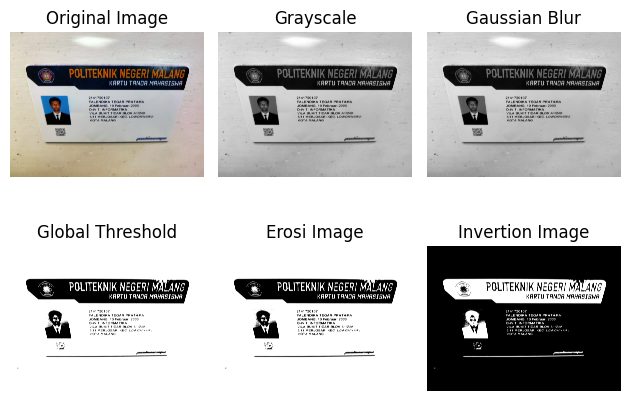

In [ ]:
image_path_falendika_4 = '/content/drive/MyDrive/PCVK/Tubes/3G_2141720107_4 - FALENDIKA TEGAR PRATAMA.jpg'
Preprocess = preprocess_image(image_path)

In [ ]:
ocr(image_path_falendika_4)

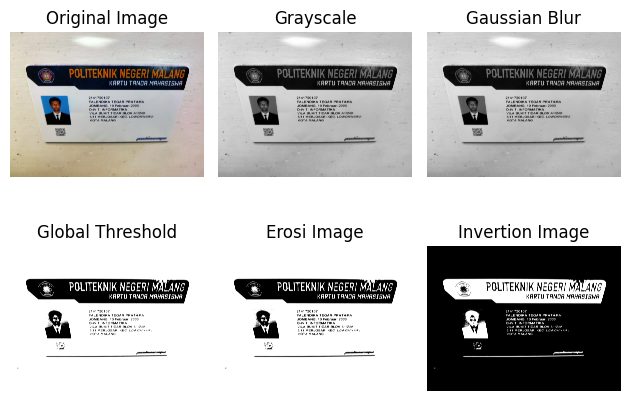

In [ ]:
image_path_falendika_5 = '/content/drive/MyDrive/PCVK/Tubes/3G_2141720107_5 - FALENDIKA TEGAR PRATAMA.jpg'
Preprocess = preprocess_image(image_path)

In [ ]:
ocr(image_path_falendika_5)

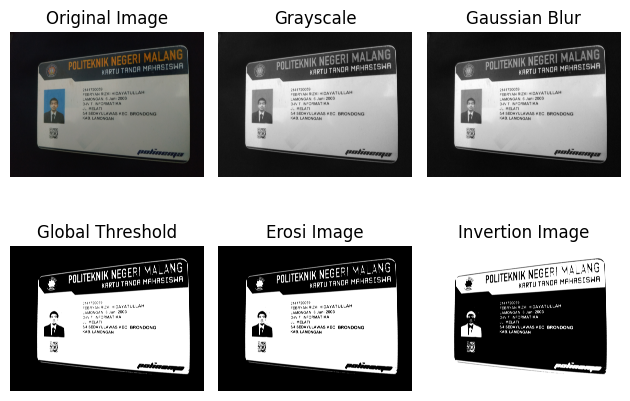

In [ ]:
image_path_Febryan_1 = '/content/drive/MyDrive/PCVK/Tubes/3F_2141720059_2 - FEBRYAN RIZKI HIDAYATULLAH.jpg'
Preprocess = preprocess_image(image_path_Febryan_1)

In [ ]:
ocr_2(image_path_Febryan_1)

In [ ]:
img_falendika_2 = cv2.imread('/content/drive/MyDrive/PCVK/Tubes/3G_2141720107_2 - FALENDIKA TEGAR PRATAMA.jpg')
img_ori_falendika_2 = cv2.cvtColor(img_falendika_2.copy(), cv2.COLOR_BGR2RGB)

def cutting(image, x, y, width, height):
    # Crop the region of interest from the image
    hasil = image[y:y+height, x:x+width]

    return hasil

# Tentukan koordinat untuk crop
# x, y, width, height = 700, 800, 3150, 1950

# img_crop_falendika_2 = cutting(img_ori_falendika_2, x, y, width, height)

# img_rgb = cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB)

img_gray_falendika_2 = cv2.cvtColor(img_crop_falendika_2, cv2.COLOR_BGR2GRAY)

img_crp_falendika_2 = cv2.cvtColor(img_crop_falendika_2.copy(), cv2.COLOR_BGR2RGB)
# blurred_image = cv2.GaussianBlur(img_gray, (1, 1), 0)

equalized_image = cv2.equalizeHist(img_gray_falendika_2)

img_gray_falendika_2 = cv2.cvtColor(img_crop_falendika_2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img_ori_falendika_2, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_gray_falendika_2, cv2.COLOR_BGR2RGB))
plt.title('Gray Image')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_crp_falendika_2, cv2.COLOR_BGR2RGB))
plt.title('Cropped image')

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Tubes/3F_2141720180_1 - Magfiroh Indah Karisma.jpg')

Text(0.5, 1.0, 'Gray Image')

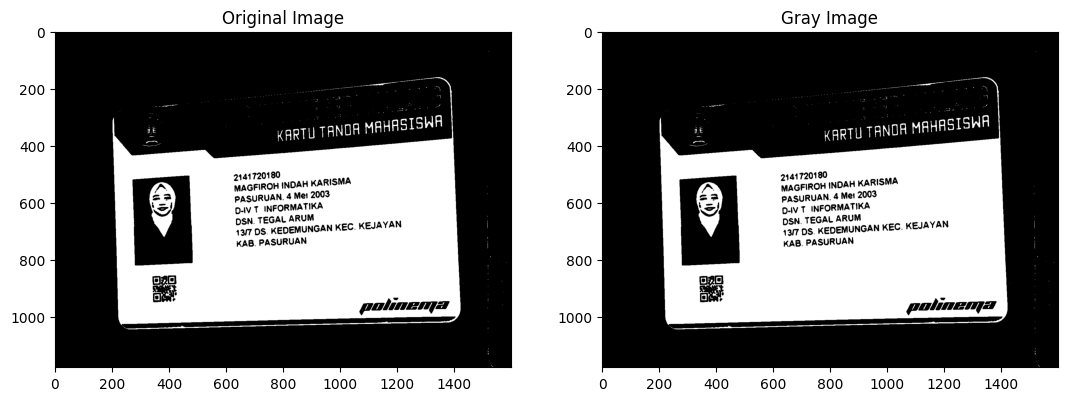

In [ ]:
img_ori = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

def cutting(image, x, y, width, height):
    # Crop the region of interest from the image
    hasil = image[y:y+height, x:x+width]

    return hasil

# Tentukan koordinat untuk crop
# x, y, width, height = 700, 800, 3150, 1950

# img_crop = cutting(img_ori, x, y, width, height)

# img_rgb = cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)

# img_crp = cv2.cvtColor(img_crop.copy(), cv2.COLOR_BGR2RGB)
# blurred_image = cv2.GaussianBlur(img_gray, (1, 1), 0)

equalized_image = cv2.equalizeHist(img_gray)

img_gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.title('Gray Image')
# plt.subplot(1, 3, 3)
# plt.imshow(cv2.cvtColor(img_crp, cv2.COLOR_BGR2RGB))
# plt.title('Cropped image')

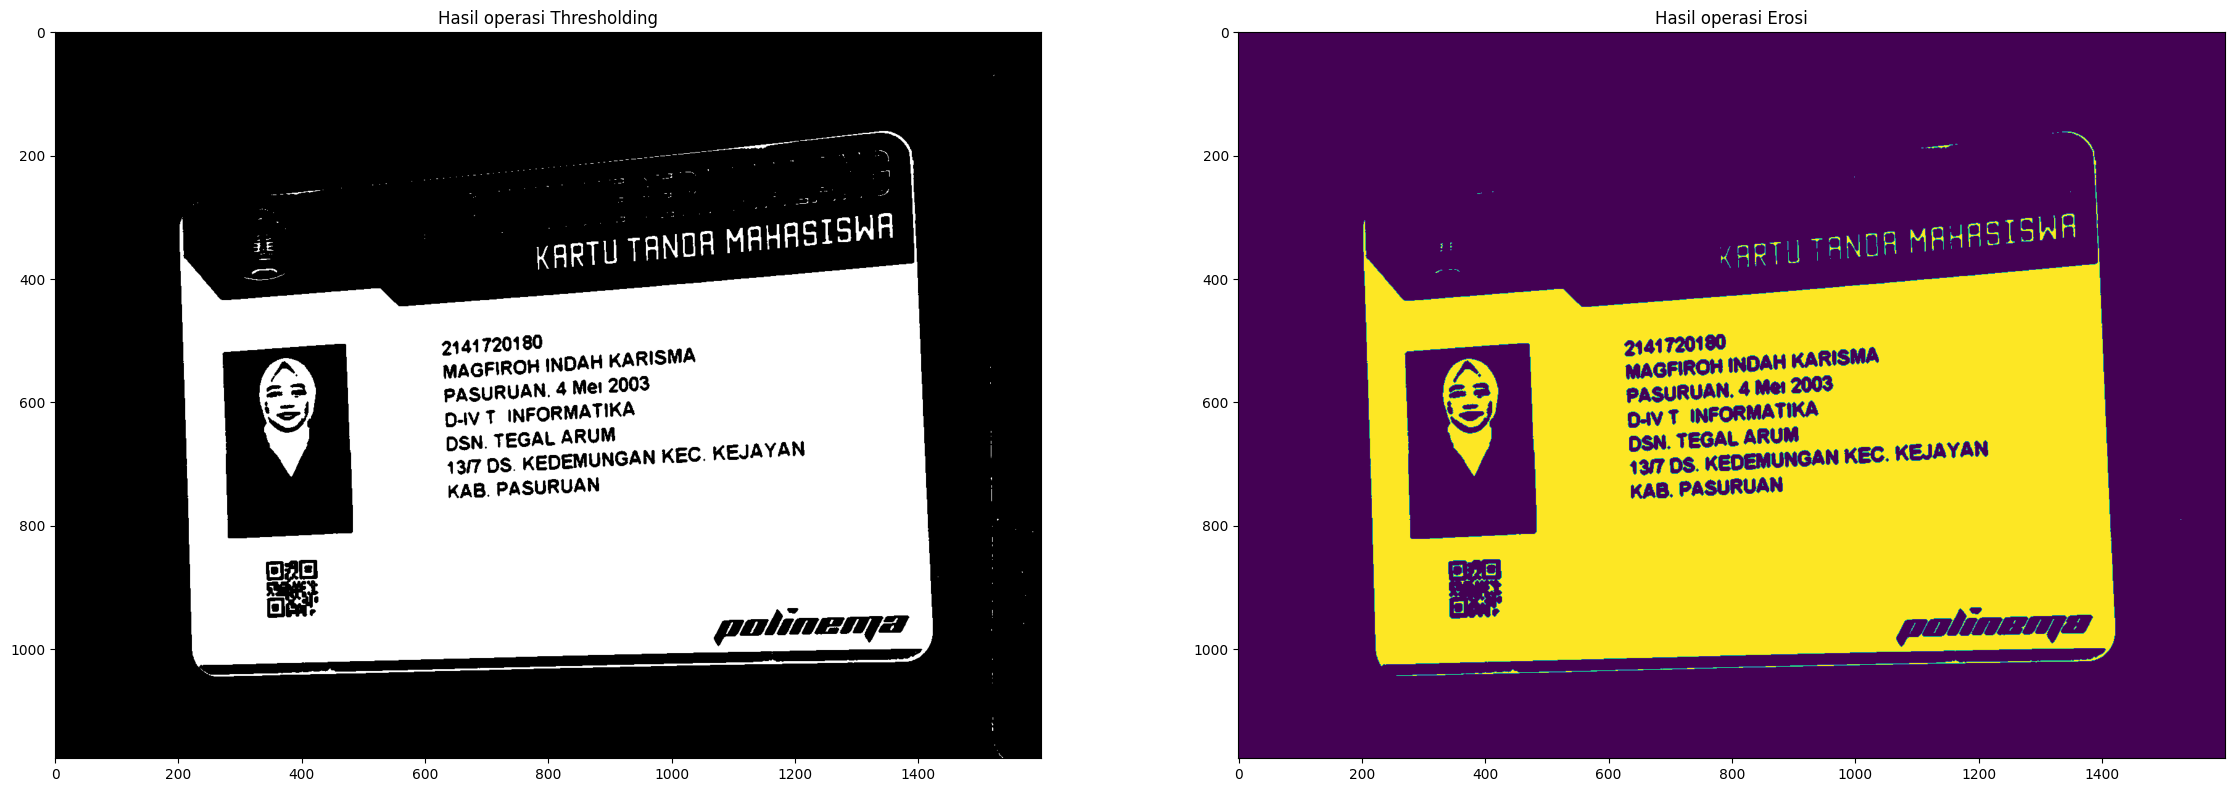

In [ ]:
# global_threshold_value = 80

def global_thresholding(image, threshold):
    binary = np.zeros_like(image)
    binary[image > threshold] = 255
    return binary
# _, thresholded_image = cv2.threshold(blurred_image, global_threshold_value, 255, cv2.THRESH_BINARY)
# kernel = np.ones((1, 1), np.uint8)

# morph_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_ERODE, kernel)
# thresholded_image = cv.cvtColor(thresholded_image, cv.COLOR_GRAY2RGB)
# img = cv2.cvtColor(img_crop, cv2.COLOR_RGB2GRAY)

global_threshold = global_thresholding(img_gray, 145)
# thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# Peningkatan kontras
# alpha = 2  # Sesuaikan nilai alpha sesuai kebutuhan
# beta = 0     # Sesuaikan nilai beta sesuai kebutuhan
# enhanced_image = cv2.convertScaleAbs(global_threshold, alpha=alpha, beta=beta)
erode_ktp = cv2.erode(global_threshold.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (3, 3)))

# erode_1 = cv2.cvtColor(erode, cv2.COLOR_GRAY2RGB)
global_threshold_1 = cv2.cvtColor(global_threshold, cv2.COLOR_GRAY2RGB)

fig, axs = plt.subplots(1, 2, figsize=(28, 10))

axs[0].imshow(global_threshold_1)
axs[0].set_title('Hasil operasi Thresholding')

axs[1].imshow(erode_ktp)
axs[1].set_title('Hasil operasi Erosi')
plt.show()

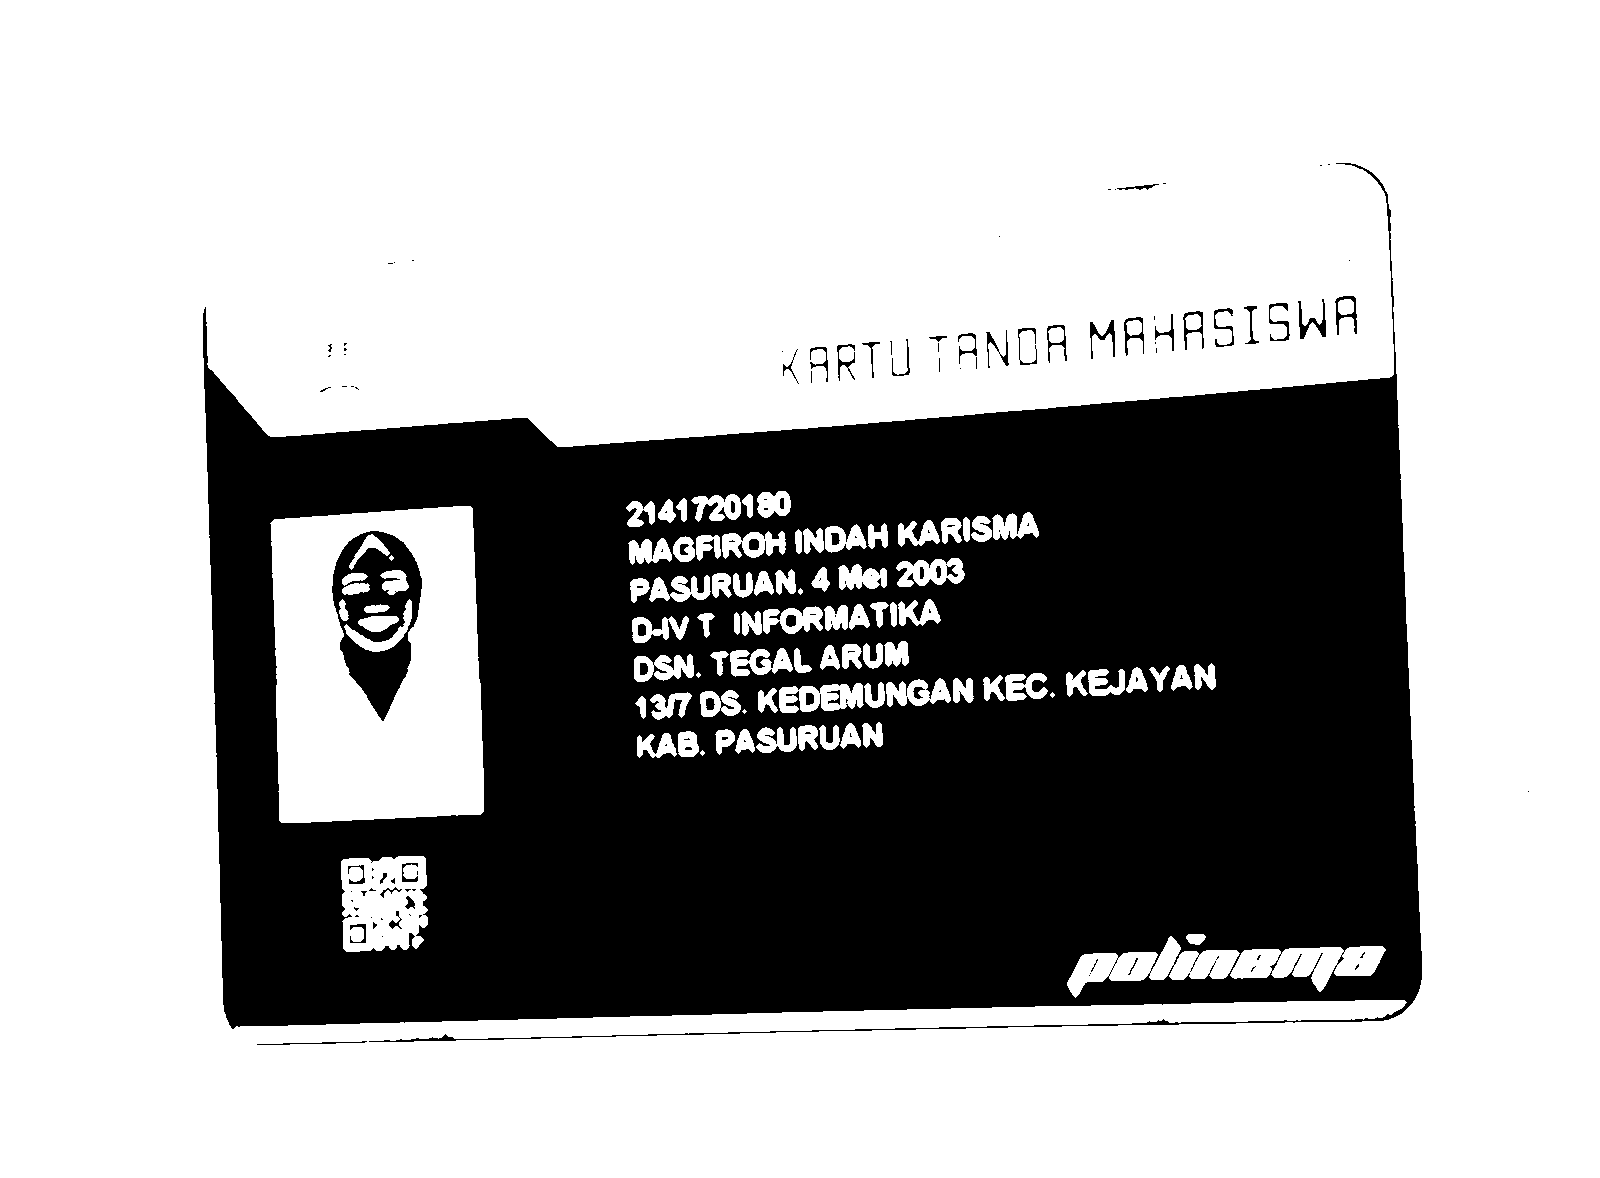

In [ ]:
# inverse image since we trained out model
img = erode_ktp.copy()
# with black background
invertion = 255 - img
# check
cv2_imshow(invertion)

In [ ]:
conts = find_contours(invertion.copy())

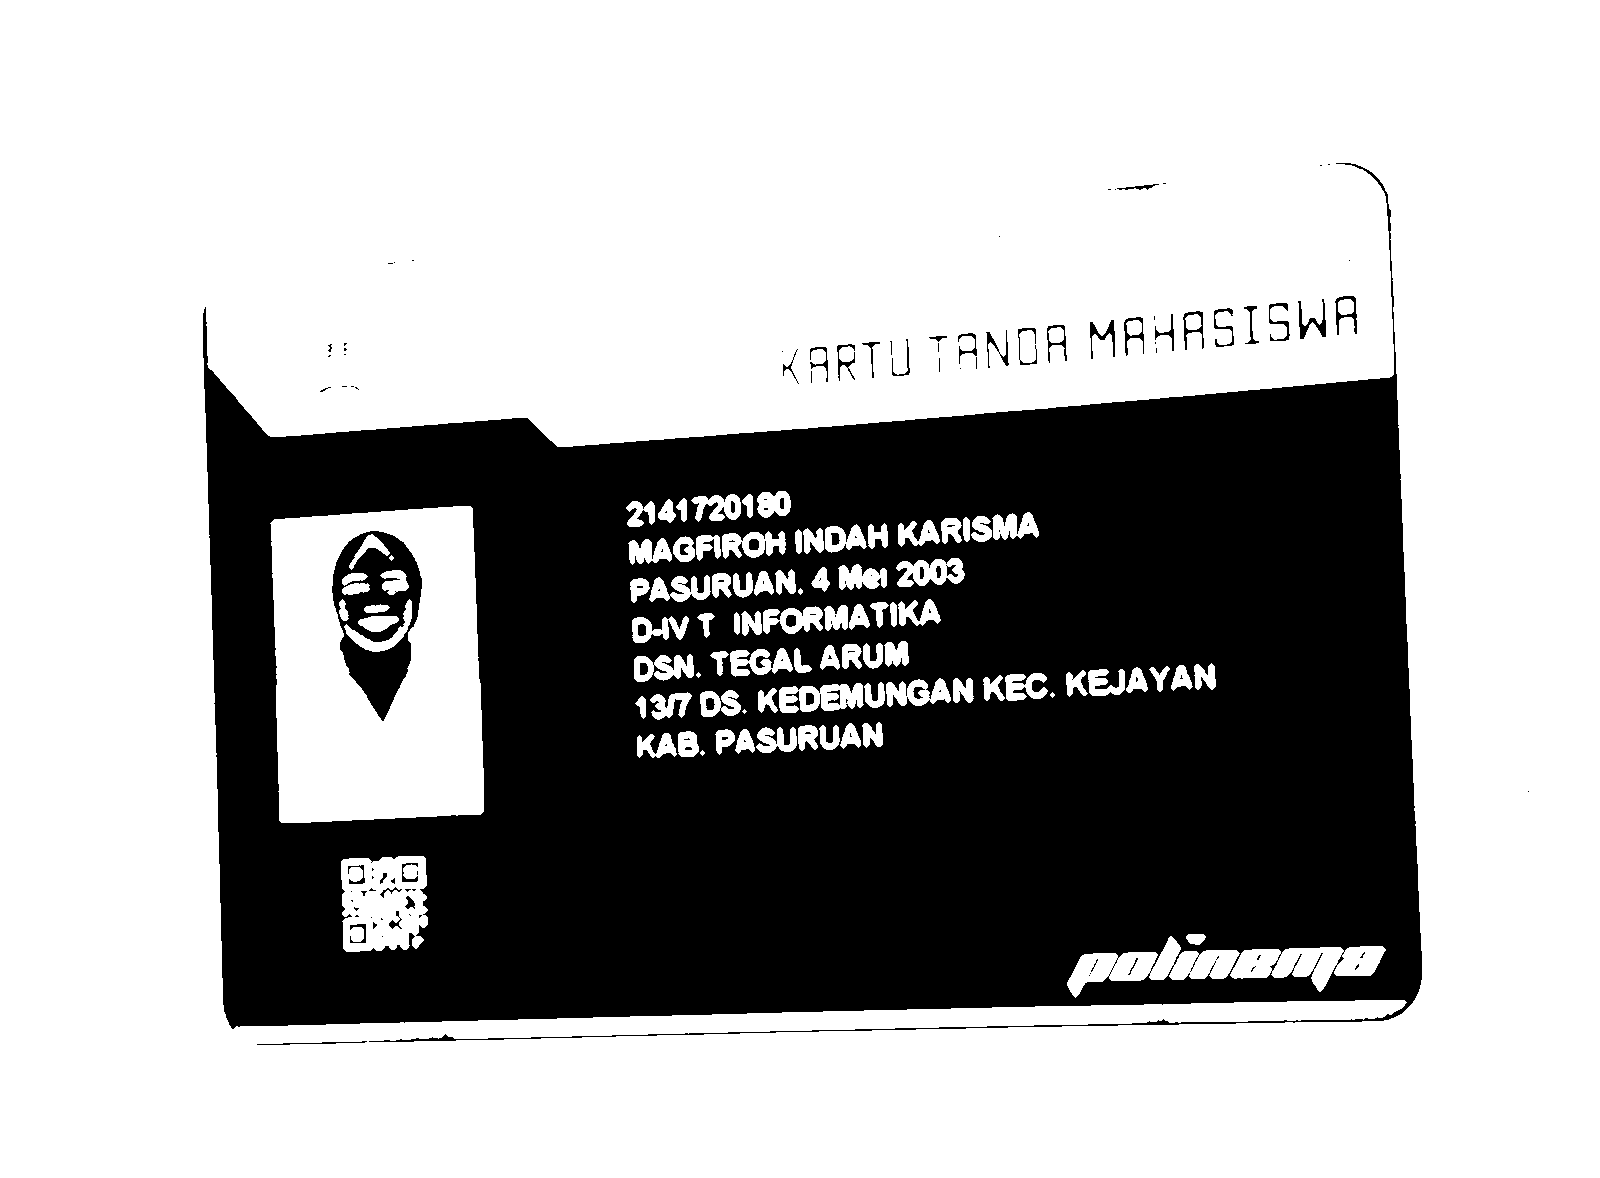

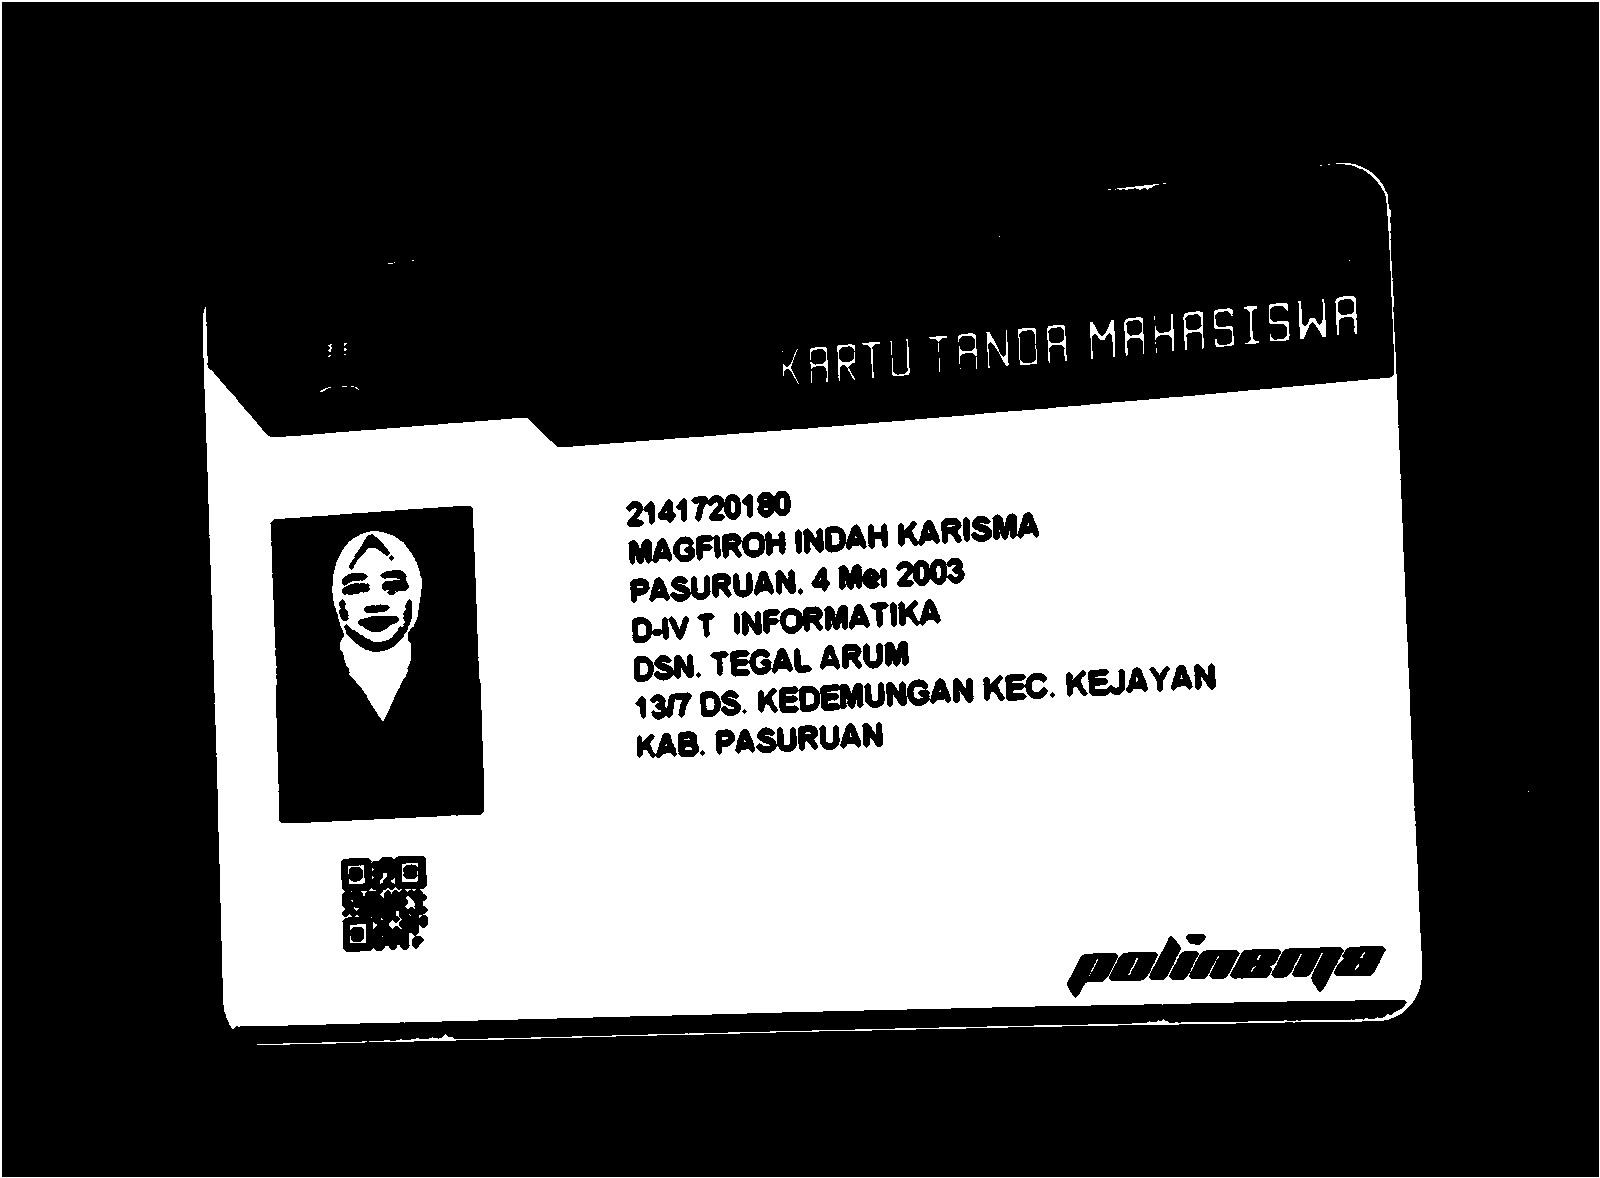

In [ ]:
# Get the char based on contour

# Setup min/max width/hight for char
min_w, max_w = 80, 160
min_h, max_h = 80, 140
img_copy = img.copy() # original image for plotting countour result

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
  # if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
  roi = img[y:y+h, x:x+w] # get region of interest for char
  thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  cv2_imshow(thresh) # check

  # Build bounding box on original image
  cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)

# Show bounding box on original image
cv2_imshow(img_copy)

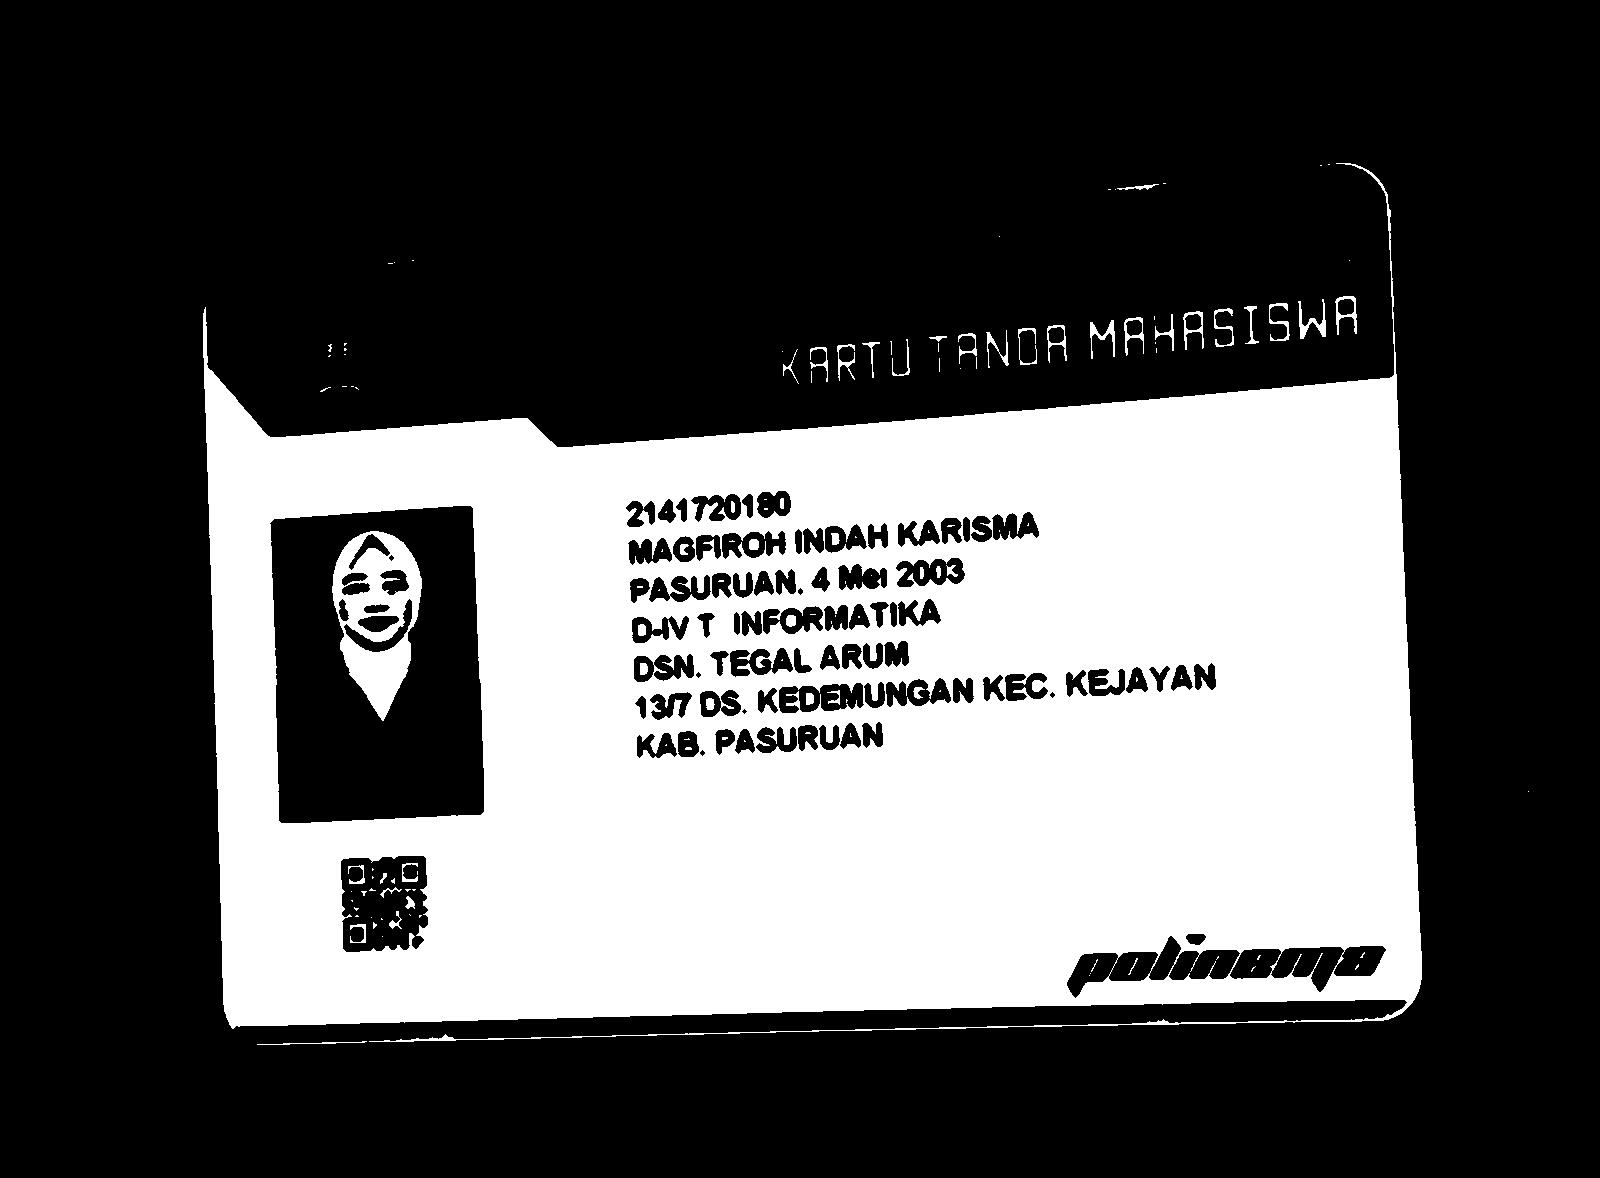

In [ ]:
# Get the char based on contour

# Setup min/max width/hight for char
min_w, max_w = 20, 160
min_h, max_h = 24, 140
img_copy = img.copy()

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
    roi = img[y:y+h, x:x+w] # get region of interest for char
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh) # check

    # Build bounding box on original image
    cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)

# Show bounding box on original image
cv2_imshow(img_copy)

In [ ]:
def extract_roi(img):
  roi = img[y:y+h, x:x+w]

  return roi

In [ ]:
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  return thresh

In [ ]:
def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width=28)
  else:
    resized = imutils.resize(img, height=28)

  # (w, h) = resized.shape
  (h, w) = resized.shape

  # Calculate how many pixels need to fill char image
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  filled = cv2.resize(filled, (28,28))

  return filled

In [ ]:
# Demo for enlarge
(x, y, w, h) = cv2.boundingRect(conts[1])
test_image = thresholding(img[y:y+h, x:x+w])

# show original test image
cv2_imshow(test_image)

# Show enlarge test image
cv2_imshow(cv2.resize(test_image, (28,28)))

IndexError: ignored

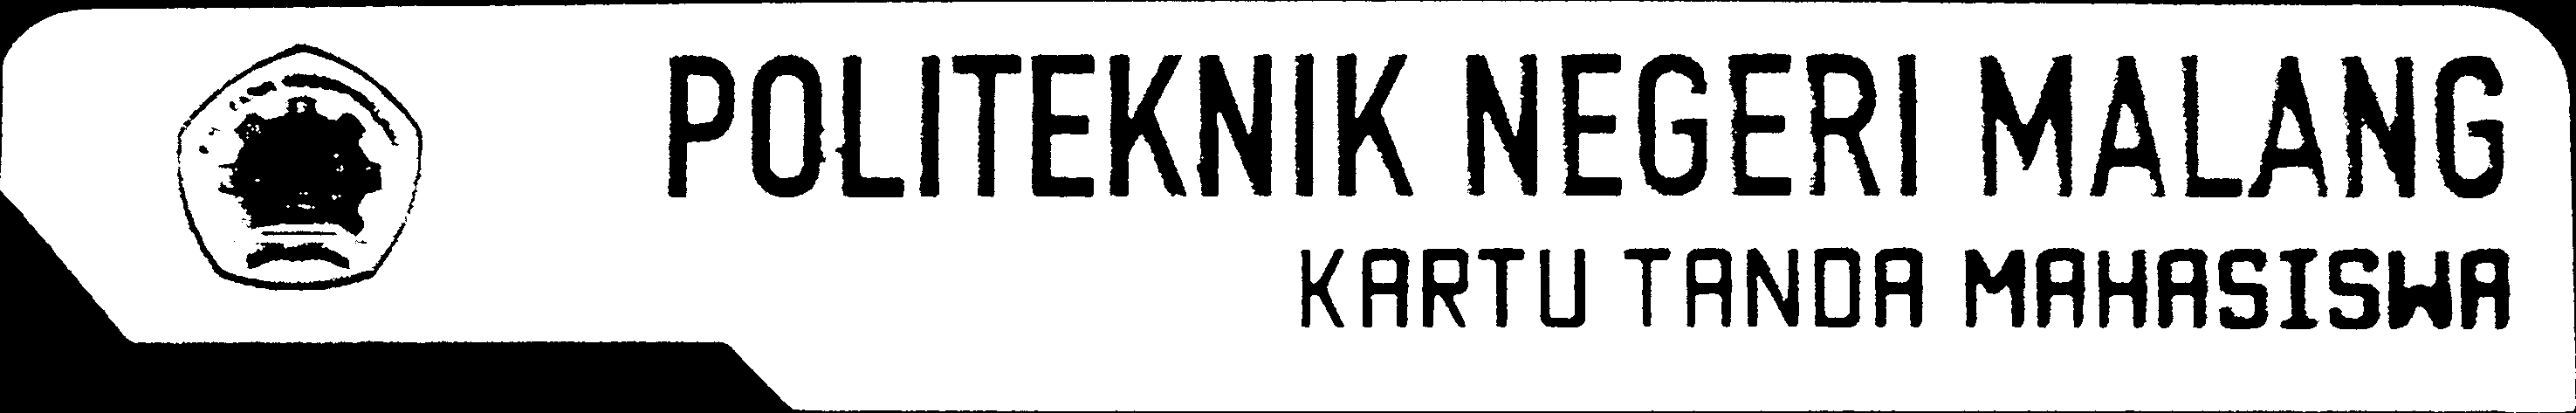

In [ ]:
# Demo by filled strategy
# (w, h) = test_image.shape
(h, w) = test_image.shape

test_image2 = resize_img(test_image, w, h)

cv2_imshow(test_image)
cv2_imshow(test_image2)

In [ ]:
def normalization(img):
  img = img.astype('float32') / 255.0 # convert to floating point
  img = np.expand_dims(img, axis=-1) # add depth
  return img

In [ ]:
# Check
test_image2.shape, normalization(test_image2).shape

((28, 28), (28, 28, 1))

In [ ]:
def process_box(gray, x, y, w, h):

  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)

  # show result
  cv2_imshow(resized)

  normalized = normalization(resized)

  return (normalized, (x, y, w, h))

In [ ]:
# Detect every single char from contour
detected_char = []

for c in conts:
  (x, y, w, h ) = cv2.boundingRect(c)

  min_w, max_w = 30, 160
  min_h, max_h = 34, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(img, x, y, w, h))